<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 2 - Binary and Multi-class Classification Using Logistic Regression</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate two logistic regression models- Binary and Multi-class Classification Using Logistic Regression.**



**Guidelines**
* Download `weatherAUS.csv` and `penguins.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 2 - Binary and Multi-class Classification Using Logistic Regression (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Binary Classification Using Logistic Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `weatherAUS.csv` file into a dataset and perform the following:

> **Q1.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

    - Dealing with the missing data
    - Dealing with the irregular data (outliers)
    - Dealing with the unnecessary data
    - Dealing with the inconsistent data
    - Encoding categorical data 

> **Q1.2.** Visualize the dataset

> **Q1.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.4.** Build a classification model using Logistic Regression to predict the target variable `RainTomorrow` from the dataset.

> **Q1.5.** Evaluate and discuss the model performance 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
dataset = pd.read_csv('weatherAUS.csv')
dataset.shape

(36881, 24)

In [3]:
dataset.head(10)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0   5/18/2009        Hobart      5.1     14.3       0.0          1.8   
1    7/3/2009    Launceston      1.1     14.5       0.4          NaN   
2   2/18/2010   Williamtown     19.7     26.2       0.0          7.2   
3    3/4/2010  PerthAirport     16.6     28.0       0.0          9.0   
4    9/9/2010     GoldCoast     14.6     25.3       0.0          NaN   
5   9/28/2011       Mildura     15.7     27.3       0.0         11.2   
6  10/13/2011     Nuriootpa      9.8     23.9       0.0          4.4   
7    4/8/2010     NorahHead     18.7     27.6       3.0          NaN   
8  10/19/2009    Townsville     23.6     30.1       0.0         11.4   
9   2/23/2010  MountGambier      8.5     22.9       1.4          4.2   

   Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0       8.9          NW           30.0        WSW  ...        47.0   
1       NaN         SSW           50.0          E  ...        46.0   
2       7.2         SSE           41.0        SSE  ...        50.0   
3      11.3          SW           54.0        SSE  ...        41.0   
4       NaN         NNW           43.0        WNW  ...        67.0   
5       5.6           N           65.0        ENE  ...        86.0   
6      10.5          SE           35.0        ENE  ...        29.0   
7       NaN         SSE           41.0        WNW  ...        64.0   
8      10.8           E           57.0        ESE  ...        48.0   
9      12.5         SSW           41.0        SSE  ...        41.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1023.1       1022.2       1.0       1.0      9.1     13.3         No   
1       1001.5       1002.4       NaN       NaN      1.3     13.7         No   
2       1020.9       1021.9       6.0       4.0     22.7     24.4         No   
3       1018.3       1014.9       6.0       1.0     20.0     26.1         No   
4       1020.3       1015.0       NaN       NaN     22.2     22.6         No   
5       1002.0        995.5       8.0       7.0     18.1     18.5         No   
6       1017.8       1013.9       3.0       4.0     15.5     23.0         No   
7       1013.2       1011.0       NaN       NaN     22.4     24.0        Yes   
8       1020.9       1018.0       4.0       2.0     27.4     27.9         No   
9       1023.1       1022.1       1.0       2.0     16.4     22.1        Yes   

   RISK_MM  RainTomorrow  
0      0.0            No  
1      0.0            No  
2      0.2            No  
3      0.0            No  
4      0.4            No  
5      5.6           Yes  
6      0.2            No  
7      0.2            No  
8      0.0            No  
9      0.0            No  

[10 rows x 24 columns]

In [4]:
dataset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

**Q.1.1.1. Dealing with the missing data**

In [5]:
dataset.isna().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64

In [6]:
# Droping the data where the value of a dependent variable is missing
dataset = dataset.dropna(subset=['RainTomorrow'])

In [7]:
dataset.isna().sum()

Date                 0
Location             0
MinTemp            205
MaxTemp             85
Rainfall           349
Evaporation      12392
Sunshine         13155
WindGustDir       3022
WindGustSpeed     3015
WindDir9am        2614
WindDir3pm         801
WindSpeed9am       506
WindSpeed3pm       490
Humidity9am        416
Humidity3pm        358
Pressure9am       3354
Pressure3pm       3328
Cloud9am         12038
Cloud3pm         12517
Temp9am            335
Temp3pm            293
RainToday          349
RISK_MM              0
RainTomorrow         0
dtype: int64

In [8]:
# Imputing data for numeric columns
from sklearn.impute import KNNImputer
numeric_columns = dataset.select_dtypes(include='number').columns
imputer = KNNImputer()
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

In [9]:
# Imputing data for string columns
string_columns = dataset.select_dtypes(include='object').columns
for column in string_columns:
    mode_value = dataset[column].mode()[0]
    dataset[column] = dataset[column].fillna(mode_value)

In [10]:
dataset.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

**Q.1.1.2. Dealing with the irregular data (outliers)**


Unique values for Date column: ['5/18/2009' '7/3/2009' '2/18/2010' ... '12/26/2007' '11/15/2007'
 '11/23/2007']

Unique values for Location column: ['Hobart' 'Launceston' 'Williamtown' 'PerthAirport' 'GoldCoast' 'Mildura'
 'Nuriootpa' 'NorahHead' 'Townsville' 'MountGambier' 'MelbourneAirport'
 'SydneyAirport' 'Darwin' 'Newcastle' 'Watsonia' 'CoffsHarbour'
 'MountGinini' 'Sale' 'PearceRAAF' 'Adelaide' 'Albury' 'Richmond'
 'Walpole' 'Cairns' 'BadgerysCreek' 'AliceSprings' 'Bendigo' 'SalmonGums'
 'Canberra' 'Ballarat' 'Woomera' 'Penrith' 'WaggaWagga' 'Dartmoor' 'Perth'
 'Cobar' 'Sydney' 'Melbourne' 'NorfolkIsland' 'Tuggeranong' 'Albany'
 'Moree' 'Wollongong' 'Portland' 'Brisbane' 'Witchcliffe']


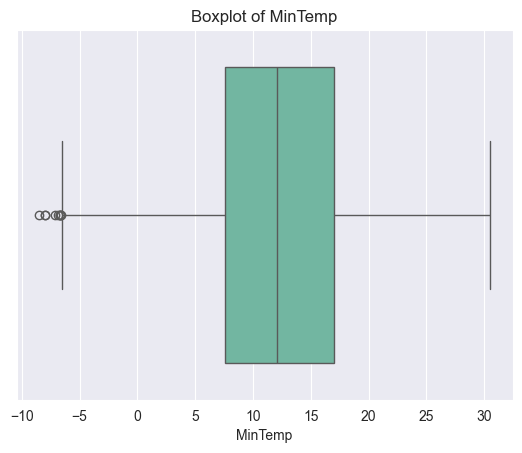

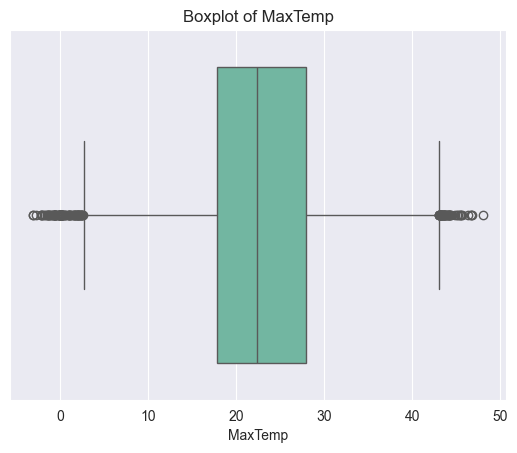

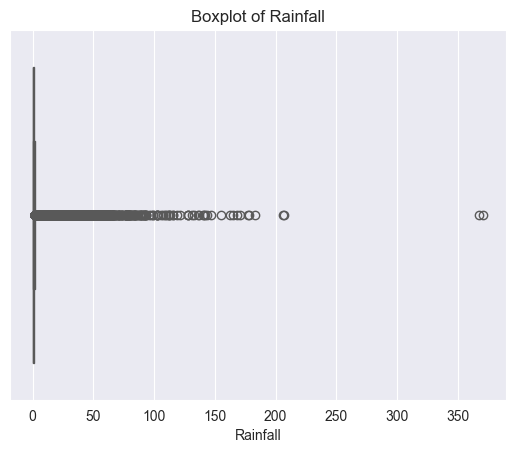

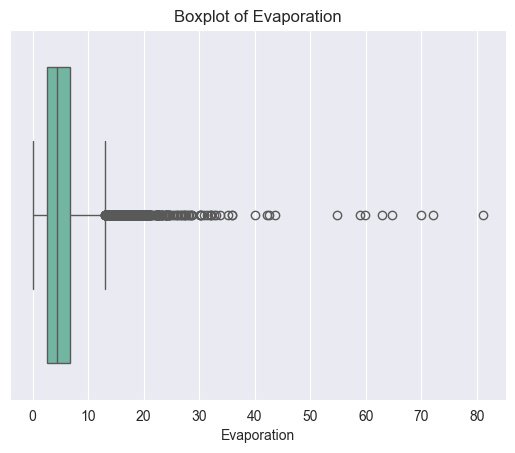

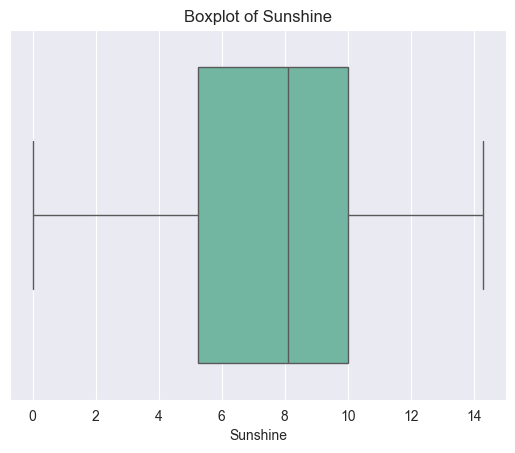


Unique values for WindGustDir column: ['NW' 'SSW' 'SSE' 'SW' 'NNW' 'N' 'SE' 'E' 'S' 'WSW' 'W' 'NE' 'NNE' 'WNW'
 'ESE' 'ENE']


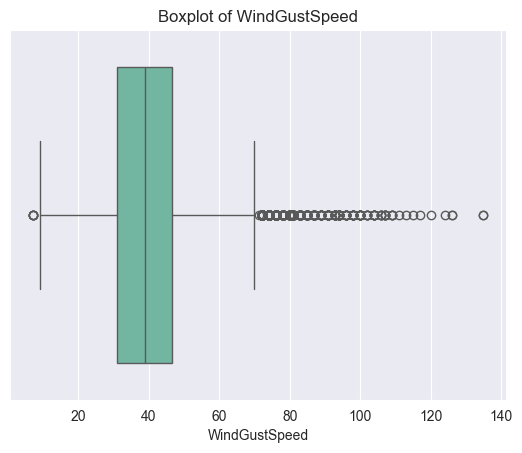


Unique values for WindDir9am column: ['WSW' 'E' 'SSE' 'WNW' 'ENE' 'ESE' 'NW' 'N' 'NE' 'SE' 'NNW' 'W' 'NNE' 'S'
 'SW' 'SSW']

Unique values for WindDir3pm column: ['SSE' 'SW' 'N' 'NNE' 'S' 'E' 'W' 'SE' 'NW' 'ESE' 'NE' 'ENE' 'WSW' 'WNW'
 'SSW' 'NNW']


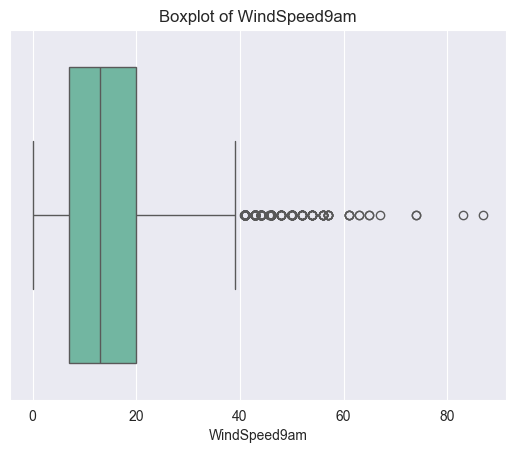

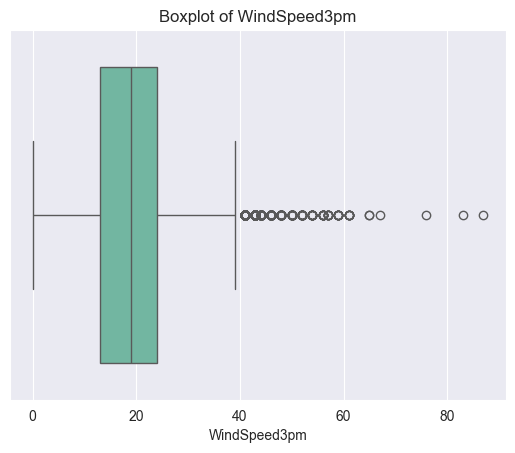

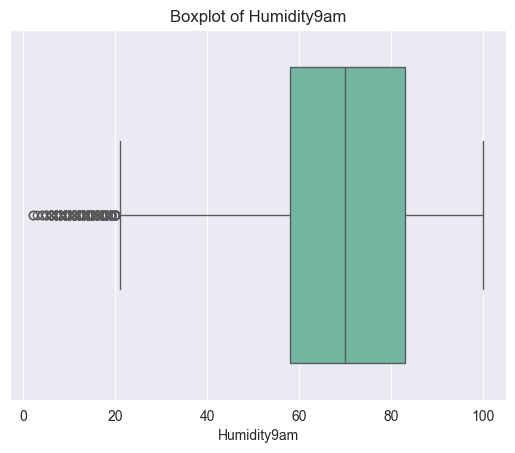

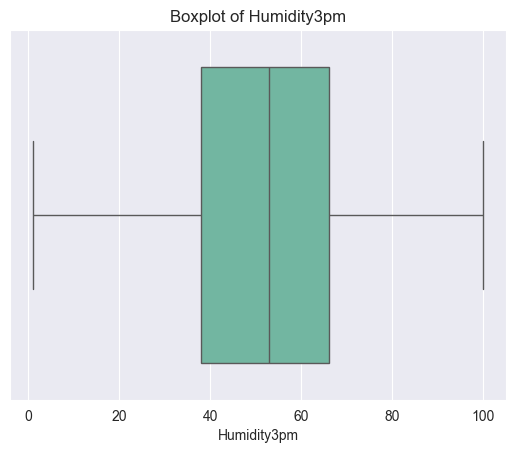

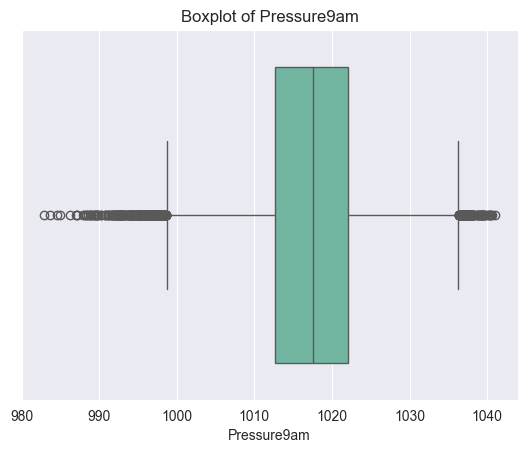

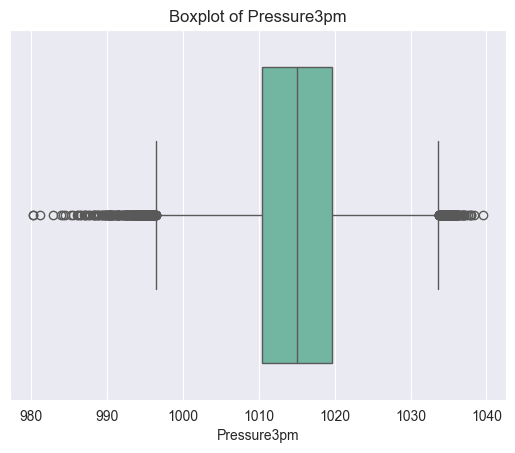

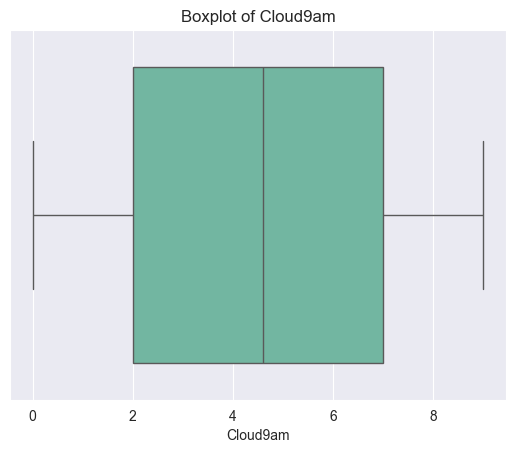

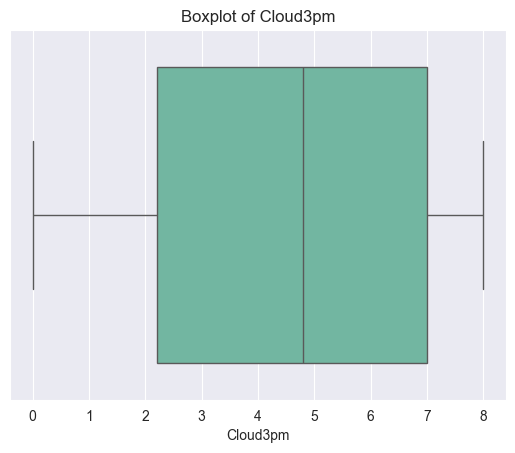

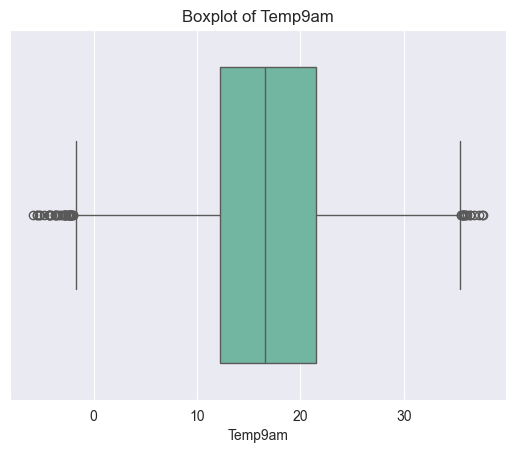

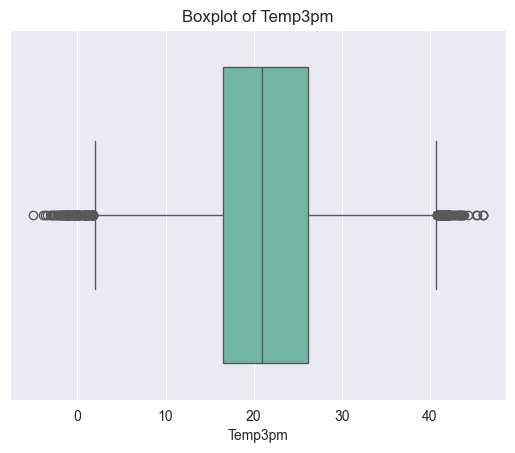


Unique values for RainToday column: ['No' 'Yes']


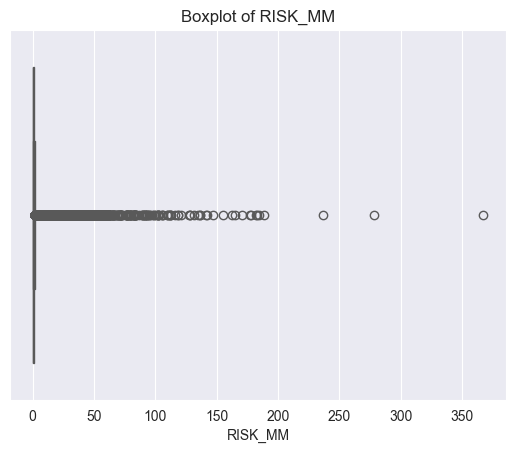


Unique values for RainTomorrow column: ['No' 'Yes']


In [11]:
for column in dataset.columns:
    if dataset[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=dataset[column])
        plt.title(f'Boxplot of {column}')
        plt.show()
    else:
        print('\nUnique values for', column, 'column:', dataset[column].unique())

In [12]:
# Remove outliers for numeric data using Isolation Forest
from sklearn.ensemble import IsolationForest
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
iso_forest = IsolationForest(contamination=0.05)
outlier_mask = iso_forest.fit_predict(dataset[numeric_columns])
dataset = dataset[outlier_mask != -1]

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34448 entries, 0 to 36880
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           34448 non-null  object 
 1   Location       34448 non-null  object 
 2   MinTemp        34448 non-null  float64
 3   MaxTemp        34448 non-null  float64
 4   Rainfall       34448 non-null  float64
 5   Evaporation    34448 non-null  float64
 6   Sunshine       34448 non-null  float64
 7   WindGustDir    34448 non-null  object 
 8   WindGustSpeed  34448 non-null  float64
 9   WindDir9am     34448 non-null  object 
 10  WindDir3pm     34448 non-null  object 
 11  WindSpeed9am   34448 non-null  float64
 12  WindSpeed3pm   34448 non-null  float64
 13  Humidity9am    34448 non-null  float64
 14  Humidity3pm    34448 non-null  float64
 15  Pressure9am    34448 non-null  float64
 16  Pressure3pm    34448 non-null  float64
 17  Cloud9am       34448 non-null  float64
 18  Cloud3pm   

**Q.1.1.3. Dealing with the unnecessary data**

In [14]:
# The column 'Date' seems unnecessary in predicting the dependent variable 'RainTomorrow', so let's drop that column
columns_to_drop = ['Date']
dataset = dataset.drop(columns=columns_to_drop)

**Q.1.1.4. Dealing with the inconsistent data**

In [15]:
# Function to extract unique characters from a string in sorted order
def unique_characters_sorted(string):
    return ''.join(sorted(set(string)))

columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
for column in columns:
    dataset[column] = dataset[column].apply(lambda x: unique_characters_sorted(x))
    print(dataset[column].unique())

['NW' 'SW' 'ES' 'N' 'E' 'S' 'W' 'EN']
['SW' 'E' 'ES' 'NW' 'EN' 'N' 'W' 'S']
['ES' 'SW' 'N' 'EN' 'S' 'E' 'W' 'NW']


**Q.1.1.5. Encoding categorical data**

In [16]:
# Label Encoding
dataset['Location'] = dataset['Location'].astype('category').cat.codes

# One Hot Encoding
dataset = pd.get_dummies(dataset, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
dataset = dataset.replace({True:1, False:0})

In [17]:
dataset.RainTomorrow.value_counts()

RainTomorrow
No     26852
Yes     7596
Name: count, dtype: int64

In [18]:
dataset.RainTomorrow.replace(['Yes', 'No'], [1,0], inplace=True)

In [19]:
dataset

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            15      5.1     14.3       0.0         1.80      8.90   
1            16      1.1     14.5       0.4         1.96      6.50   
2            42     19.7     26.2       0.0         7.20      7.20   
3            30     16.6     28.0       0.0         9.00     11.30   
4            14     14.6     25.3       0.0         6.36     10.18   
...         ...      ...      ...       ...          ...       ...   
36876        29     10.1     14.2       7.4         3.40      0.00   
36877        30      6.3     26.0       0.0         5.00     10.60   
36878        13     20.5     31.7       0.0         7.00     11.10   
36879        29      6.3     23.3       0.0         5.20     11.60   
36880        26      9.4     26.3       0.0         4.80     12.20   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  \
0               30.0           7.0           6.0         65.0  ...   
1               50.0           7.0          24.0         99.0  ...   
2               41.0          19.0          31.0         48.0  ...   
3               54.0          28.0          33.0         50.0  ...   
4               43.0           6.0          28.0         64.0  ...   
...              ...           ...           ...          ...  ...   
36876           46.0          19.0          15.0         84.0  ...   
36877           37.0           9.0          26.0         38.0  ...   
36878           37.0          20.0          13.0         54.0  ...   
36879           39.0           9.0          20.0         50.0  ...   
36880           35.0          15.0          20.0         50.0  ...   

       WindDir3pm_E  WindDir3pm_EN  WindDir3pm_ES  WindDir3pm_N  \
0                 0              0              1             0   
1                 0              0              0             0   
2                 0              0              1             0   
3                 0              0              0             0   
4                 0              0              0             1   
...             ...            ...            ...           ...   
36876             0              0              0             1   
36877             0              0              0             0   
36878             0              0              1             0   
36879             0              0              0             0   
36880             0              0              0             0   

       WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SW  WindDir3pm_W  RainToday_No  \
0                  0             0              0             0             1   
1                  0             0              1             0             1   
2                  0             0              0             0             1   
3                  0             0              1             0             1   
4                  0             0              0             0             1   
...              ...           ...            ...           ...           ...   
36876              0             0              0             0             0   
36877              0             0              1             0             1   
36878              0             0              0             0             1   
36879              0             0              1             0             1   
36880              0             0              1             0             1   

       RainToday_Yes  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
36876              1  
36877              0  
36878              0  
36879              0  
36880              0  

[34448 rows x 45 columns]

**Q1.2. Visualize the dataset**

In [20]:
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

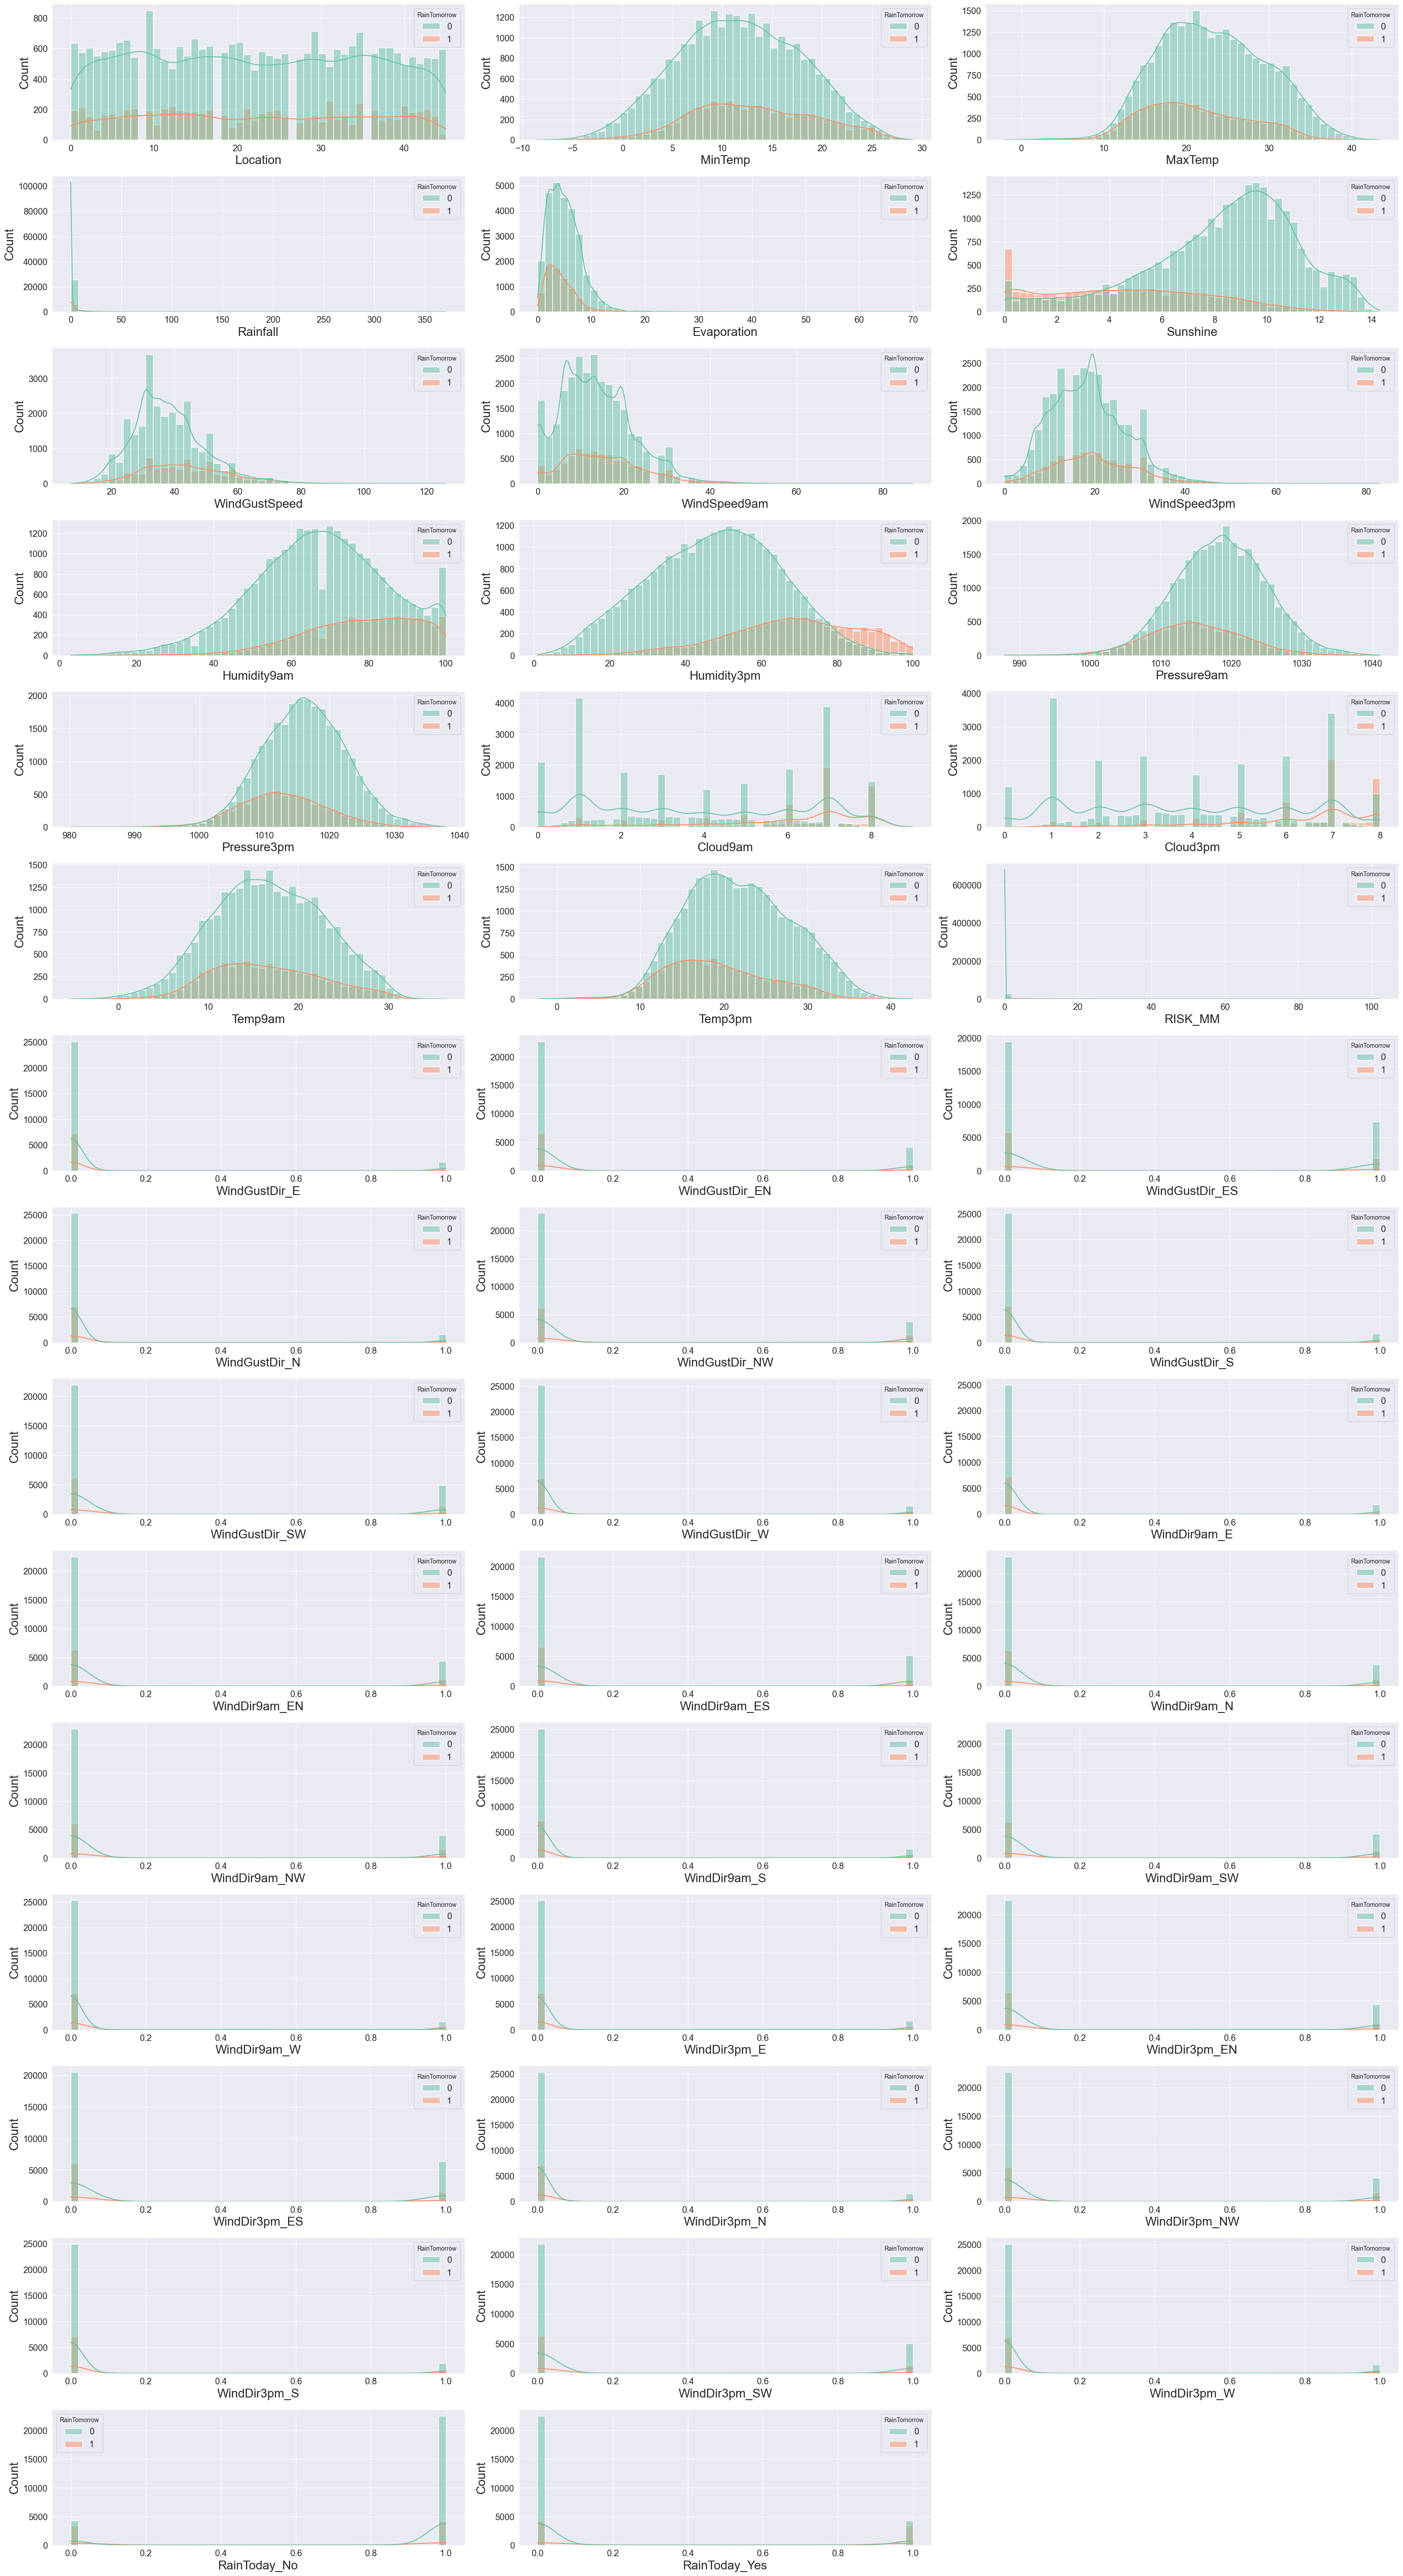

In [21]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(dataset, x=col, hue='RainTomorrow', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

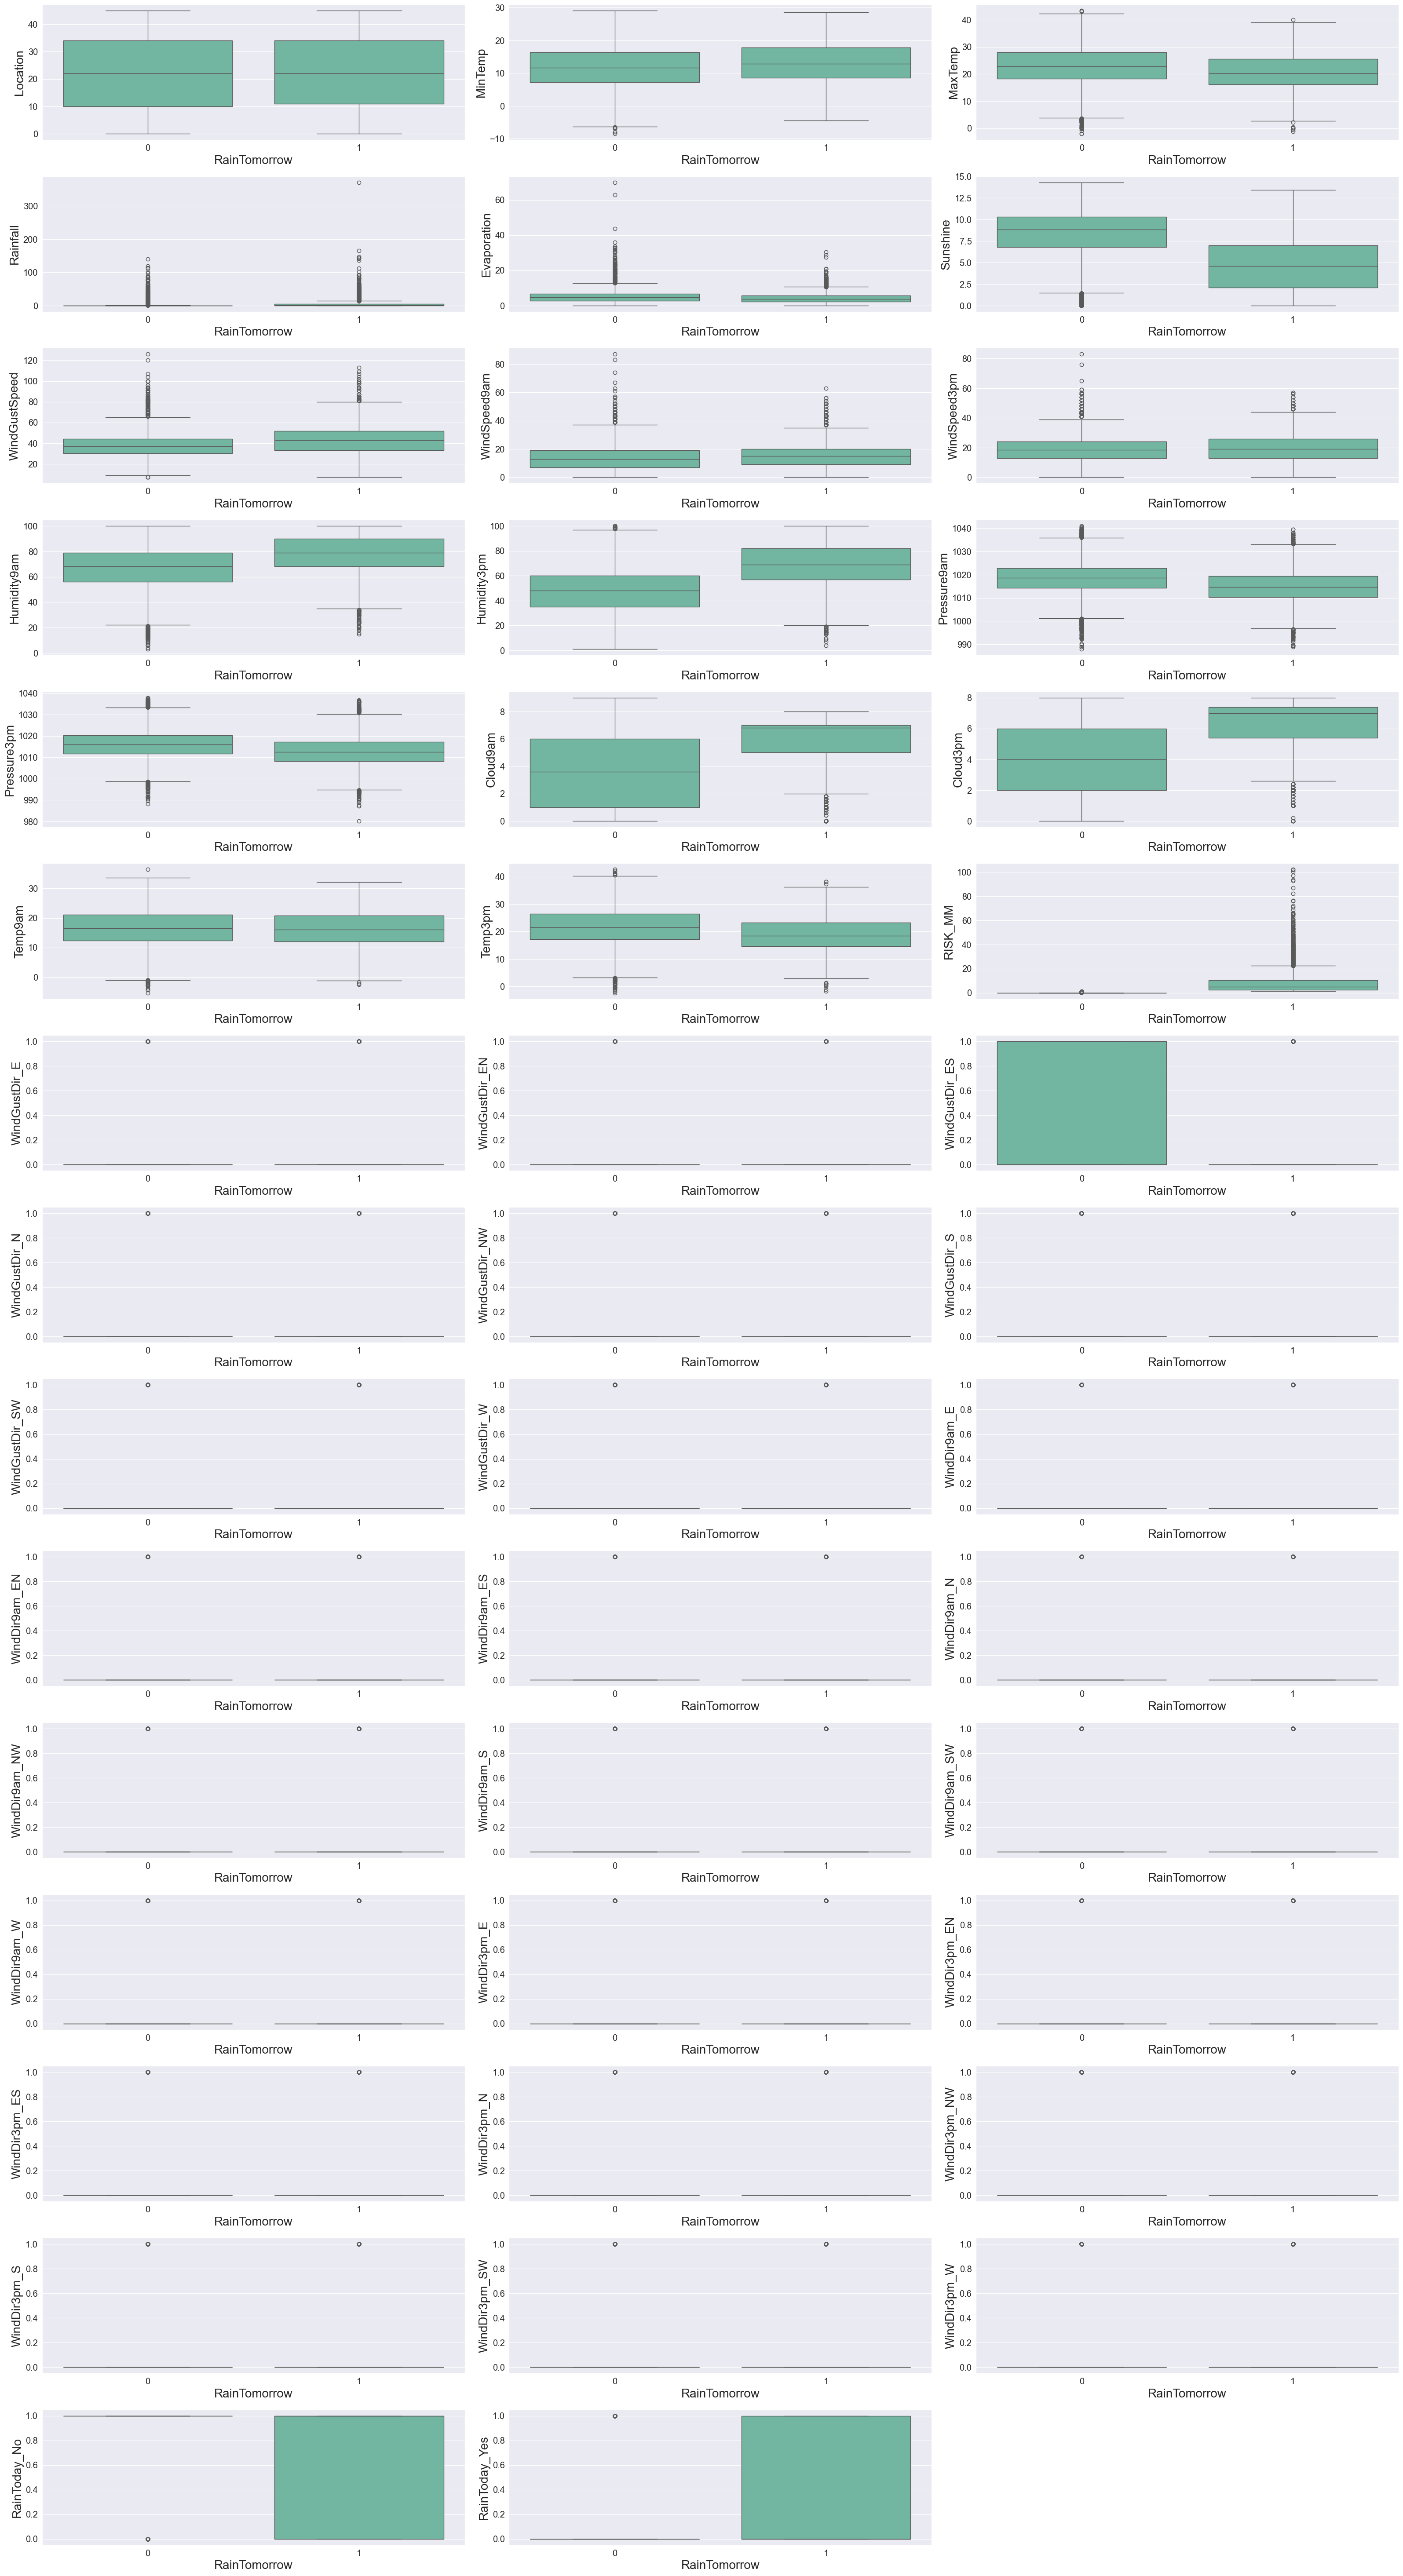

In [22]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=dataset, x='RainTomorrow', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('RainTomorrow', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

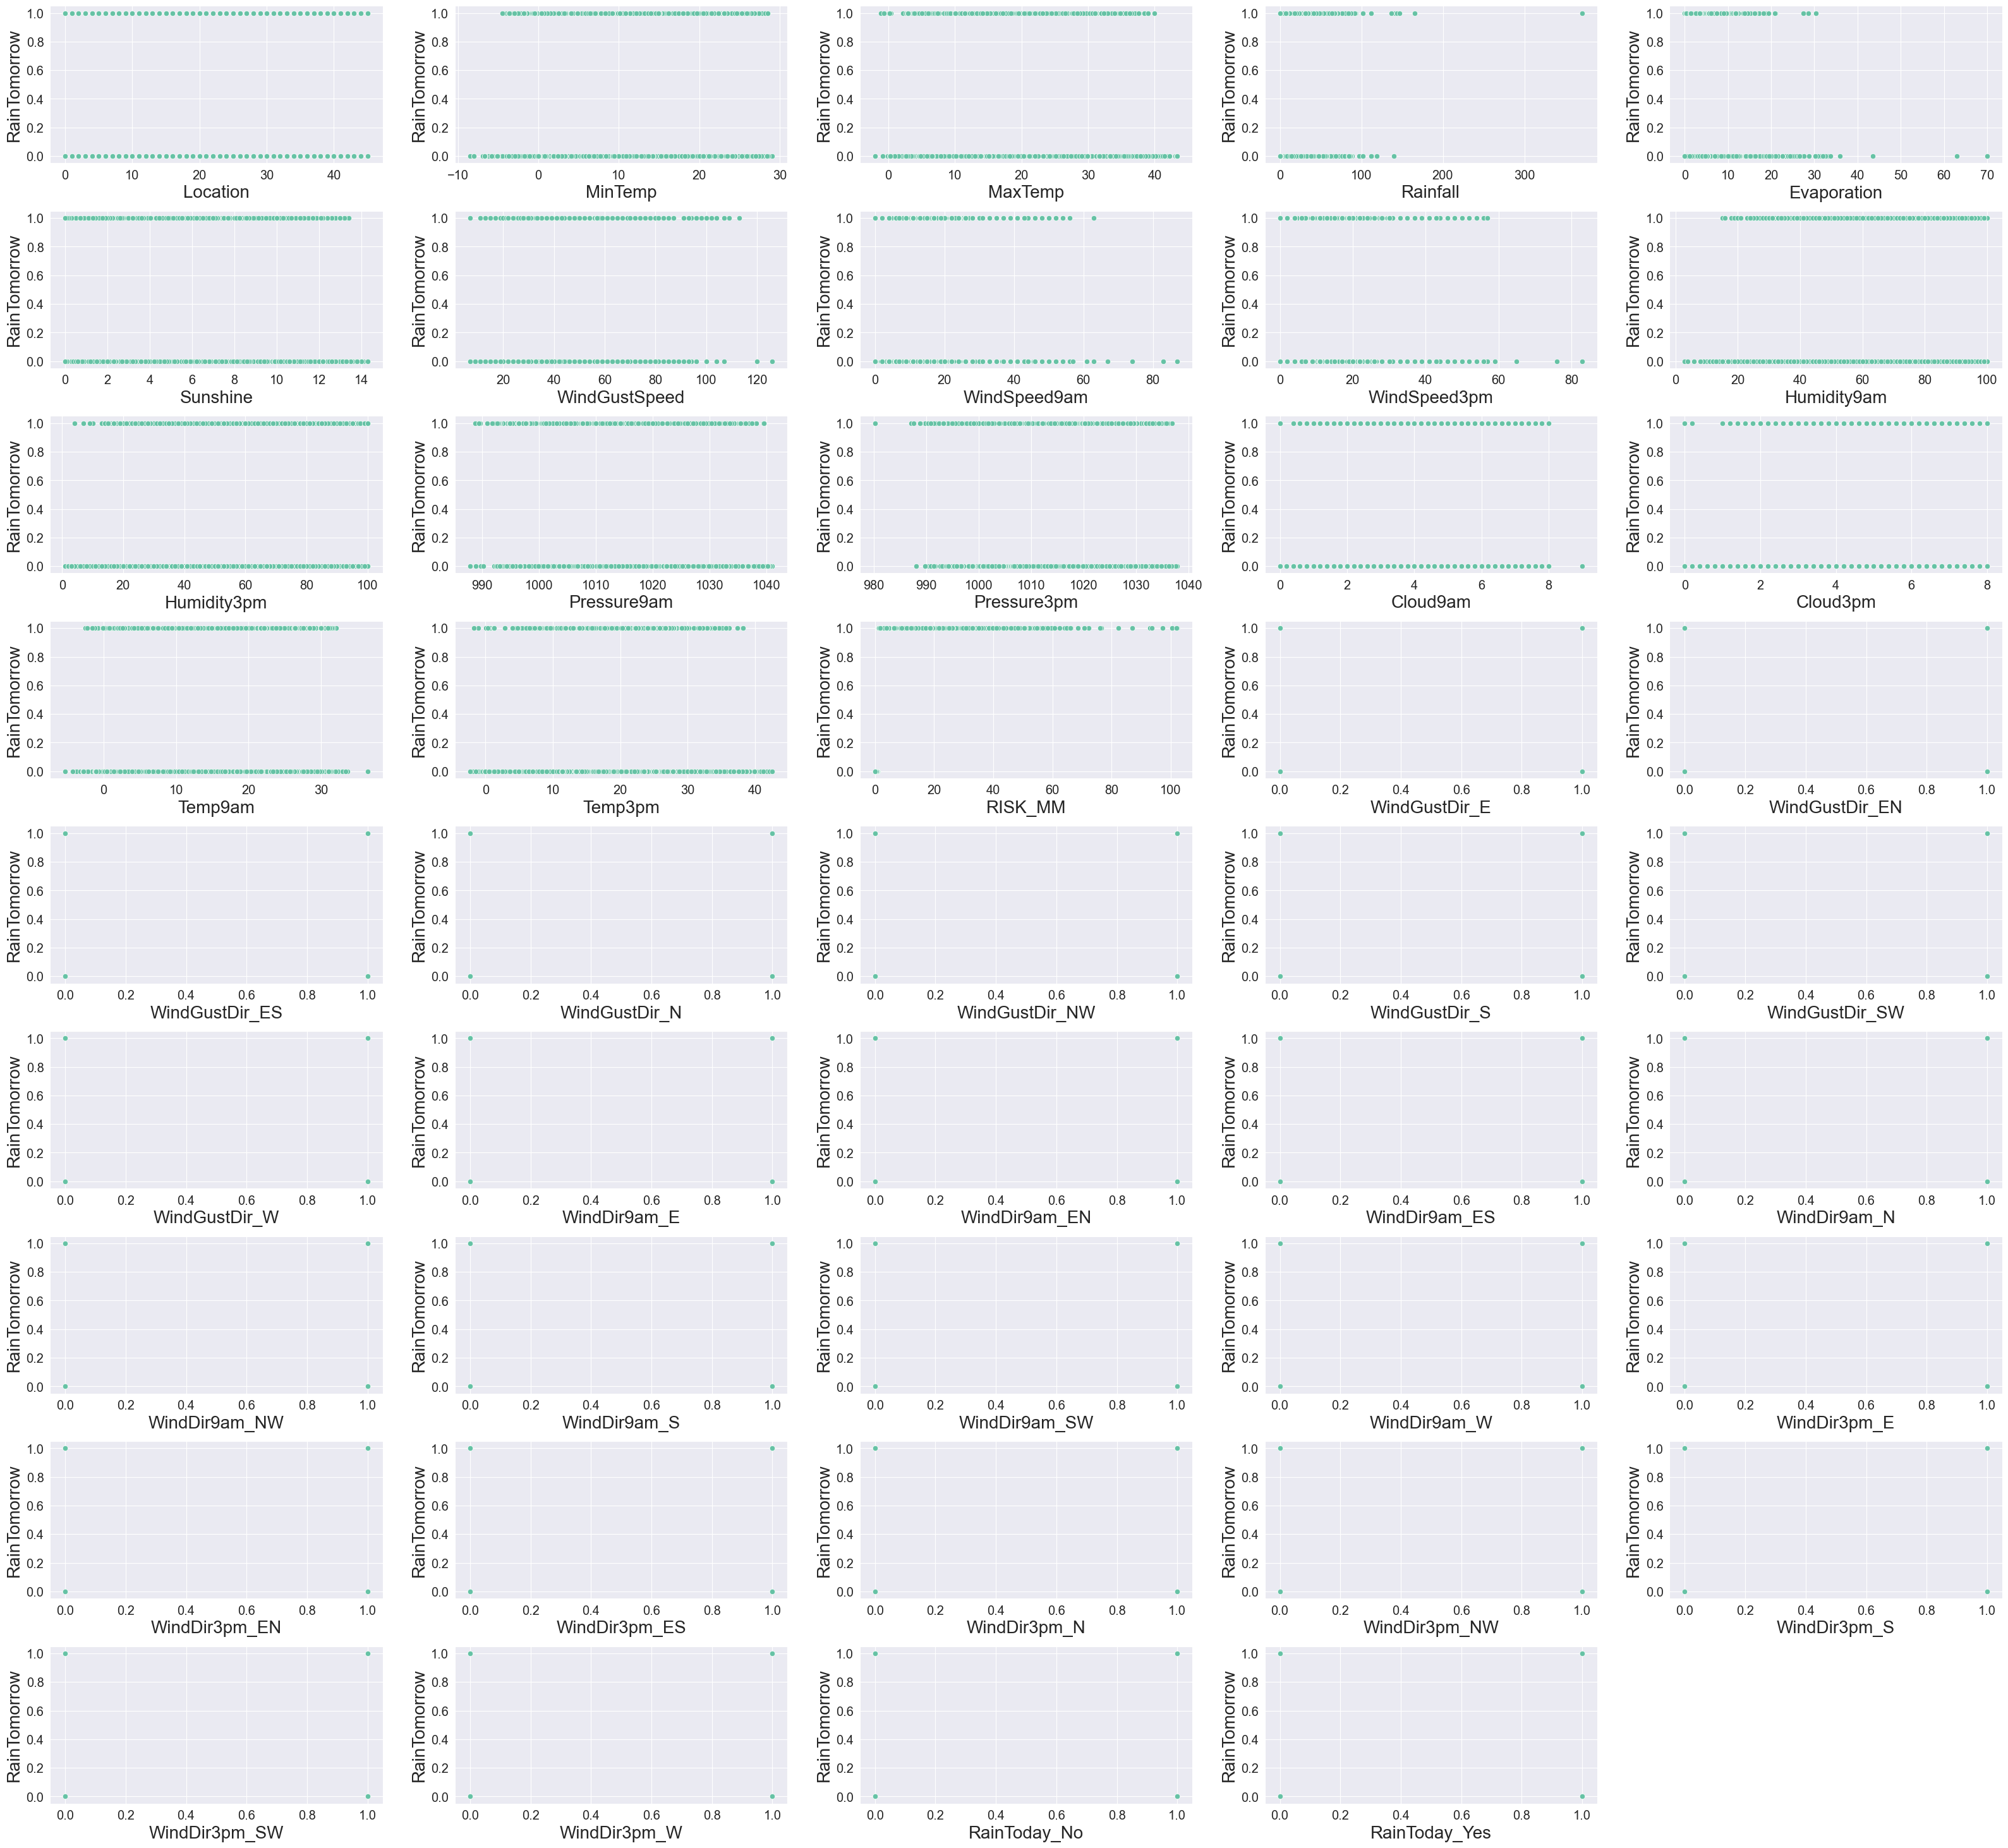

In [23]:
plt.figure(figsize=(32, 32))

num_cols = 5
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=dataset, x=col, y='RainTomorrow')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('RainTomorrow', fontsize=20)

plt.tight_layout()
plt.show()

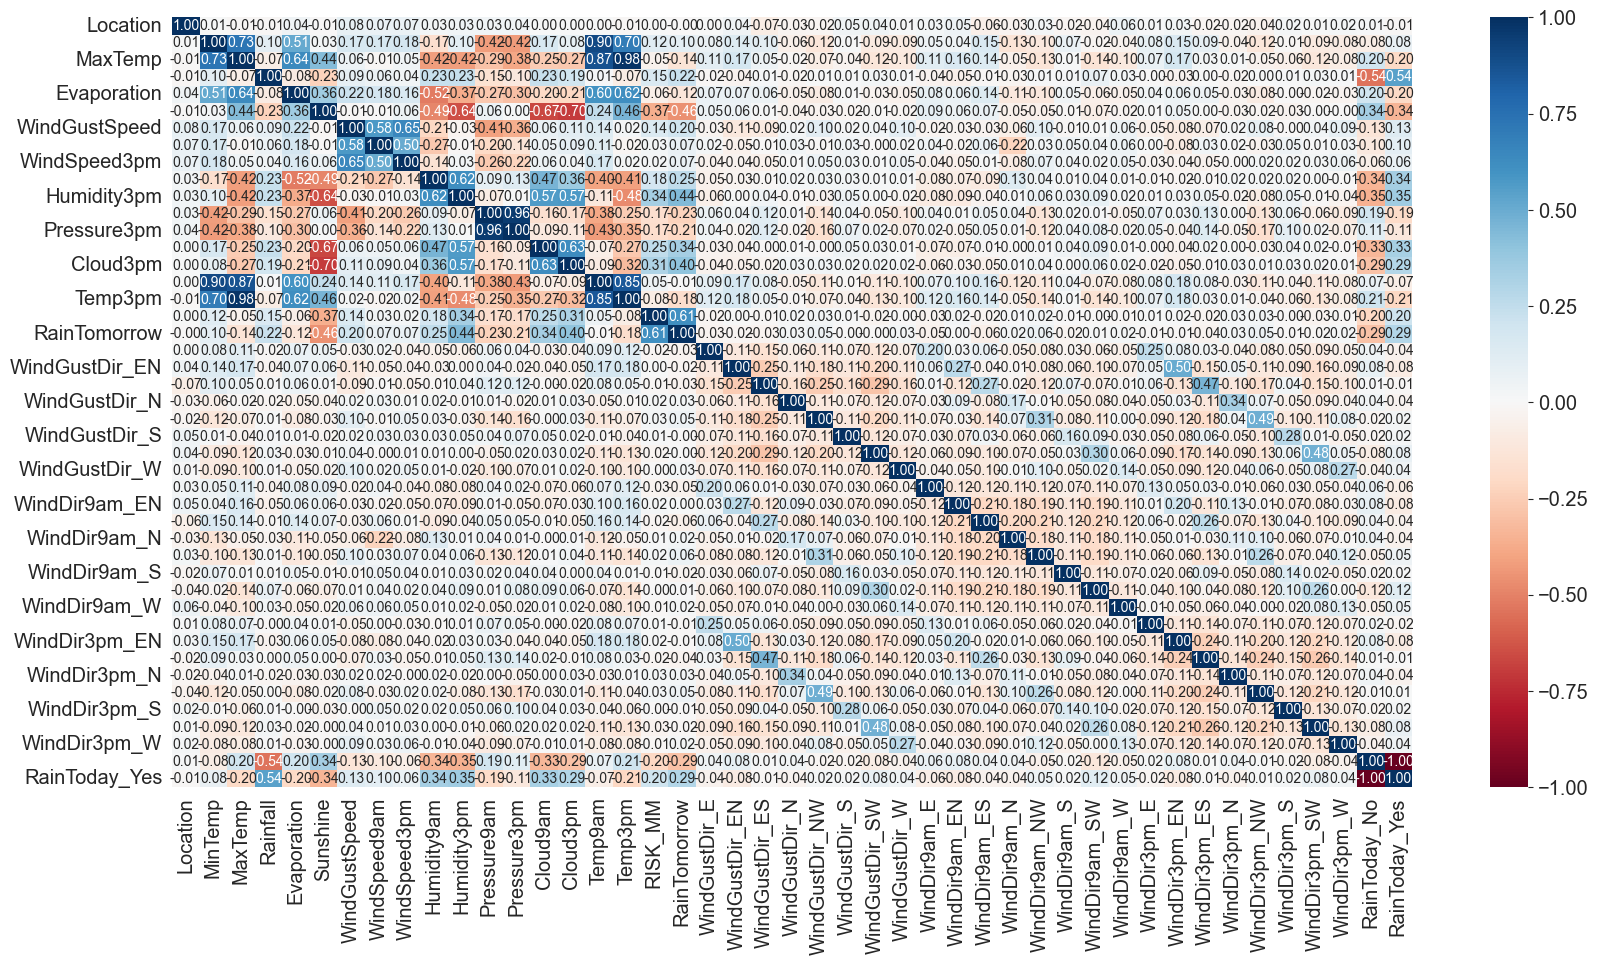

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset.corr(), cmap='RdBu', annot=True, fmt=".2f");

**Q1.3. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability**

**Answer:** Upon reviewing the dataset, it is found that there exist 36881 rows and 23 columns to predict the dependent variable 'RainTomorrow' i.e. 24 total columns. This dataset consists of some of the missing values, outliers, unnecessary data, and inconsistent data. The dependent variable had 620 missing values. Therefore, we had to drop these rows as imputing the value of the dependent variable is not a good practice, and dropping 620 rows out of 36881 can be considered significantly small.

After dropping the 'Date' column, as it does not seem to provide any contribution in predicting the dependent variable 'RainTomorrow' and correcting the inconsistent values by deleting the duplicate acronyms for direction and sorting the acronyms, we encoded the categorical values. Since, the column 'Location' had a lot of distinct values, applying 'One Hot Encoding' would not be the best solution. Therefore, we applied 'Label Encoding' for 'Location' and the rest was encoded with 'One Hot Encoding' except the dependent variable 'RainTomorrow' which was encoded using 'Find and Replace.'

Reviewing the heatmap of all the resulting columns, it was clear that there is a high correlation between the dependent variable 'RainTomorrow' and the independent variable 'Sunshine', 'Humidity3pm', 'Cloud3pm', and 'Temp3pm.'

**Q1.4. Build a classification model using Logistic Regression to predict the target variable RainTomorrow from the dataset.**

In [25]:
# Getting independent and dependent variables 
y = dataset.RainTomorrow.values
X = dataset.drop(['RainTomorrow'], axis=1)

In [26]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [27]:
# Normalizing the independent variables: Makes the convergence faster 
X_train=(X_train-np.min(X_train, axis=0))/(np.max(X_train, axis=0)-np.min(X_train, axis=0))
X_test=(X_test-np.min(X_test, axis=0))/(np.max(X_test, axis=0)-np.min(X_test, axis=0))

In [28]:
X_train

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
24491  0.866667  0.686170  0.693833  0.000000     0.128571  0.930070   
6798   0.911111  0.632979  0.550661  0.000000     0.102857  0.524476   
24832  0.777778  0.667553  0.506608  0.001617     0.131429  0.160839   
24735  0.333333  0.473404  0.345815  0.020485     0.031429  0.034965   
8647   0.866667  0.547872  0.513216  0.000000     0.040000  0.258741   
...         ...       ...       ...       ...          ...       ...   
22247  0.866667  0.489362  0.343612  0.021024     0.022857  0.167832   
34371  0.333333  0.452128  0.337004  0.048518     0.111429  0.300699   
32585  0.644444  0.348404  0.513216  0.000000     0.040000  0.741259   
22767  0.955556  0.401596  0.378855  0.008625     0.050857  0.454545   
2942   0.844444  0.353723  0.275330  0.007547     0.021143  0.419580   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  \
24491       0.327731      0.321839      0.132530     0.505155  ...   
6798        0.361345      0.172414      0.313253     0.618557  ...   
24832       0.304202      0.229885      0.240964     0.886598  ...   
24735       0.305882      0.218391      0.289157     0.649485  ...   
8647        0.268908      0.080460      0.084337     0.752577  ...   
...              ...           ...           ...          ...  ...   
22247       0.142857      0.126437      0.180723     0.896907  ...   
34371       0.361345      0.298851      0.289157     0.876289  ...   
32585       0.193277      0.045977      0.204819     0.670103  ...   
22767       0.268908      0.149425      0.156627     0.680412  ...   
2942        0.176471      0.045977      0.132530     0.855670  ...   

       WindDir3pm_E  WindDir3pm_EN  WindDir3pm_ES  WindDir3pm_N  \
24491           0.0            1.0            0.0           0.0   
6798            0.0            0.0            0.0           0.0   
24832           1.0            0.0            0.0           0.0   
24735           0.0            0.0            1.0           0.0   
8647            0.0            1.0            0.0           0.0   
...             ...            ...            ...           ...   
22247           0.0            0.0            0.0           0.0   
34371           0.0            0.0            1.0           0.0   
32585           0.0            0.0            0.0           0.0   
22767           0.0            0.0            0.0           0.0   
2942            0.0            0.0            0.0           0.0   

       WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SW  WindDir3pm_W  RainToday_No  \
24491            0.0           0.0            0.0           0.0           1.0   
6798             0.0           0.0            1.0           0.0           1.0   
24832            0.0           0.0            0.0           0.0           1.0   
24735            0.0           0.0            0.0           0.0           0.0   
8647             0.0           0.0            0.0           0.0           1.0   
...              ...           ...            ...           ...           ...   
22247            0.0           0.0            1.0           0.0           0.0   
34371            0.0           0.0            0.0           0.0           0.0   
32585            0.0           0.0            1.0           0.0           1.0   
22767            0.0           1.0            0.0           0.0           0.0   
2942             0.0           1.0            0.0           0.0           0.0   

       RainToday_Yes  
24491            0.0  
6798             0.0  
24832            0.0  
24735            1.0  
8647             0.0  
...              ...  
22247            1.0  
34371            1.0  
32585            0.0  
22767            1.0  
2942             1.0  

[25836 rows x 44 columns]

In [29]:
X_test

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
22862  0.644444  0.699717  0.547511  0.000000     0.211111  0.622378   
36537  0.511111  0.677054  0.676471  0.002421     0.140000  0.509091   
21690  0.711111  0.288952  0.466063  0.000000     0.130556  0.583217   
20233  0.444444  0.592068  0.450226  0.000000     0.155556  0.000000   
20792  0.111111  0.558074  0.787330  0.000000     0.223333  0.693706   
...         ...       ...       ...       ...          ...       ...   
7871   0.133333  0.334278  0.414027  0.000000     0.066667  0.295105   
35559  0.911111  0.481586  0.366516  0.000000     0.111111  0.034965   
2009   0.844444  0.589235  0.710407  0.150121     0.253333  0.674126   
32355  0.511111  0.790368  0.696833  0.001211     0.331111  0.539860   
23417  0.777778  0.668555  0.699095  0.048426     0.105556  0.699301   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  ...  \
22862       0.300885      0.229730      0.333333     0.595745  ...   
36537       0.184071      0.000000      0.105263     0.776596  ...   
21690       0.106195      0.000000      0.105263     0.989362  ...   
20233       0.327434      0.405405      0.192982     0.712766  ...   
20792       0.415929      0.148649      0.385965     0.734043  ...   
...              ...           ...           ...          ...  ...   
7871        0.230088      0.148649      0.350877     0.712766  ...   
35559       0.398230      0.229730      0.263158     0.542553  ...   
2009        0.327434      0.229730      0.491228     0.797872  ...   
32355       0.265487      0.000000      0.333333     0.329787  ...   
23417       0.334513      0.202703      0.456140     0.680851  ...   

       WindDir3pm_E  WindDir3pm_EN  WindDir3pm_ES  WindDir3pm_N  \
22862           0.0            0.0            0.0           0.0   
36537           0.0            0.0            1.0           0.0   
21690           0.0            1.0            0.0           0.0   
20233           0.0            1.0            0.0           0.0   
20792           0.0            0.0            0.0           0.0   
...             ...            ...            ...           ...   
7871            0.0            1.0            0.0           0.0   
35559           0.0            1.0            0.0           0.0   
2009            0.0            0.0            0.0           0.0   
32355           0.0            0.0            1.0           0.0   
23417           0.0            0.0            1.0           0.0   

       WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SW  WindDir3pm_W  RainToday_No  \
22862            0.0           0.0            1.0           0.0           1.0   
36537            0.0           0.0            0.0           0.0           1.0   
21690            0.0           0.0            0.0           0.0           1.0   
20233            0.0           0.0            0.0           0.0           1.0   
20792            1.0           0.0            0.0           0.0           1.0   
...              ...           ...            ...           ...           ...   
7871             0.0           0.0            0.0           0.0           1.0   
35559            0.0           0.0            0.0           0.0           1.0   
2009             1.0           0.0            0.0           0.0           0.0   
32355            0.0           0.0            0.0           0.0           1.0   
23417            0.0           0.0            0.0           0.0           0.0   

       RainToday_Yes  
22862            0.0  
36537            0.0  
21690            0.0  
20233            0.0  
20792            0.0  
...              ...  
7871             0.0  
35559            0.0  
2009             1.0  
32355            0.0  
23417            1.0  

[8612 rows x 44 columns]

In [30]:
# Fitting the logistic regression model to the training data
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [31]:
# Predicting the class for the test data
y_pred = logre.predict(X_test)

In [32]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Q1.5. Evaluate and discuss the model performance**

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9182535996284255


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6661
           1       0.98      0.66      0.78      1951

    accuracy                           0.92      8612
   macro avg       0.94      0.83      0.87      8612
weighted avg       0.92      0.92      0.91      8612



[[6630   31]
 [ 673 1278]]


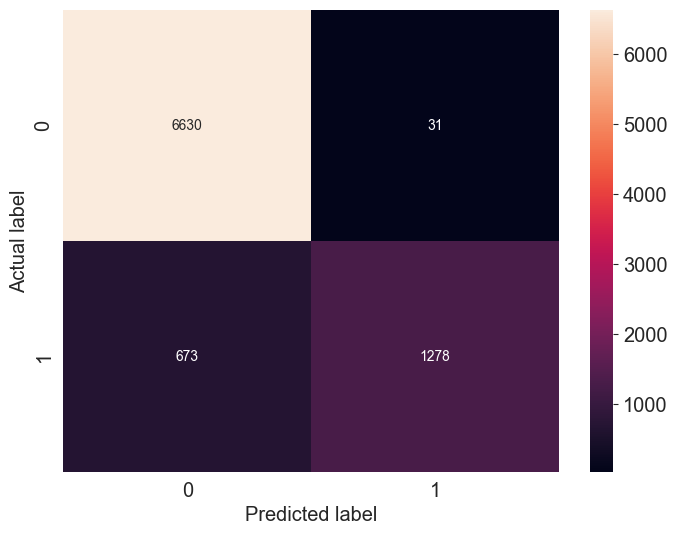

In [36]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

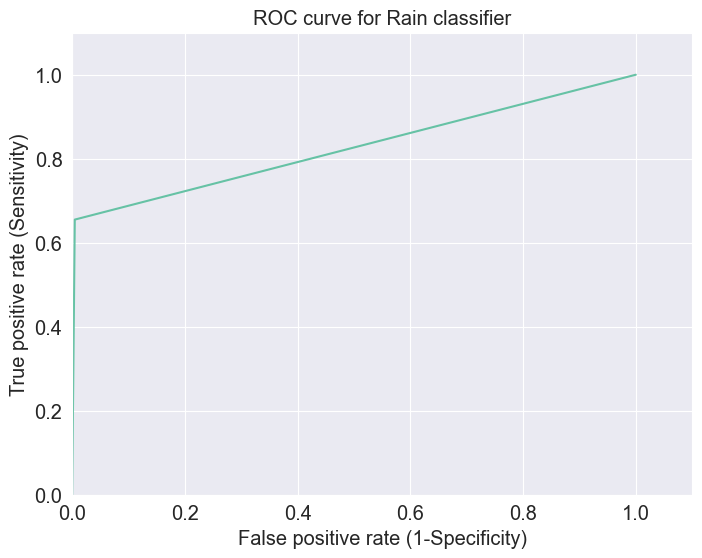

In [37]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.1])
plt.ylim([0.0, 1.1])
plt.title('ROC curve for Rain classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.8251973685577384

**Answer:**

**Accuracy** - The accuracy of this model is 91.82%, which means that this model correctly predicts the chances of rain tomorrow at a 91.82% probability.

**Precision** - Precision measures the proportion of true positive predictions among all positive predictions.

> For the class 'No' of the dependent variable 'RainTomorrow', the precision is 91%, which indicates that 91% of the samples predicted as the class 'No' are actually class 'No.'

> For the class 'Yes' of the dependent variable 'RainTomorrow', the precision is 98%, which indicates that 98% of the samples predicted as the class 'Yes' are actually class 'Yes.'

**Recall** - Recall measures the proportion of true positive predictions among all actual positive samples.

> For the class 'No' of the dependent variable 'RainTomorrow', the recall is 100%, indicating that 100% of the actual class 'No' samples are correctly predicted as the class 'No'. 

> For the class 'Yes' of the dependent variable 'RainTomorrow', the recall is 66%, indicating that 66% of the actual class 'Yes' samples are correctly predicted as the class 'Yes'.

**F1-score** - The F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall. For class 'No', the F1-score is 95%, and for class 'Yes', it is 78%.

**Confusion Matrix** - The confusion matrix provides a breakdown of the model's predictions for each class. It shows that the model correctly predicted 6630 samples of class 'No' and 1278 samples of class 'Yes'. However, it incorrectly classified 673 samples of class 'No' as class 'Yes' (false positives) and 31 samples of class 'Yes' as class 'No' (false negatives).

**ROC AUC Score** - The ROC AUC score measures the area under the receiver operating characteristic (ROC) curve. It provides an aggregate measure of the model's ability to discriminate between positive and negative samples. A score of 0.82 indicates that the model has good discriminatory power.

Overall, the logistic regression model appears to perform well, especially in terms of accuracy and class 'No' predictions (high precision, recall, and F1-score). However, there is some room for improvement in predicting class 'Yes', as indicated by the lower recall and F1-score for that class.

# Question 2: Multi-Class Classification Using Logistic Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `penguins.csv` file and perform the following:

> **Q2.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

        - Dealing with the missing data
        - Dealing with the irregular data (outliers)
        - Dealing with the unnecessary data
        - Dealing with the inconsistent data
        - Encoding categorical data 
        
> **Q2.2.** Visualize the dataset

> **Q2.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q2.4.** Build a classification model using Logistic Regression to predict the penguins species.

> **Q2.5.** Evaluate and discuss the model performance 

In [39]:
dataset = pd.read_csv('penguins.csv')
dataset.shape

(344, 7)

In [40]:
dataset.head(10)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
5       3650.0    MALE  
6       3625.0  FEMALE  
7       4675.0    MALE  
8       3475.0     NaN  
9       4250.0     NaN

In [41]:
dataset.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

**Q.2.1.1. Dealing with the missing data**

In [42]:
dataset.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [44]:
numberOfRowsWithMissingValues = dataset.isnull().any(axis=1).sum()
numberOfRowsWithMissingValues

11

In [45]:
dataset = dataset.dropna()

In [46]:
dataset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


**Q.2.1.2. Dealing with the irregular data (outliers)**


Unique values for species column: ['Adelie' 'Chinstrap' 'Gentoo']

Unique values for island column: ['Torgersen' 'Biscoe' 'Dream']


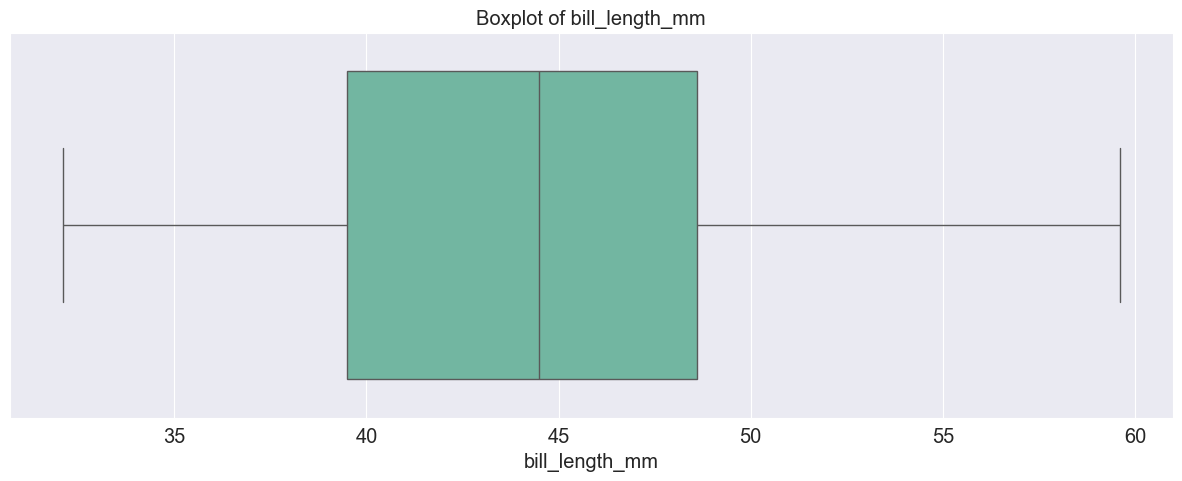

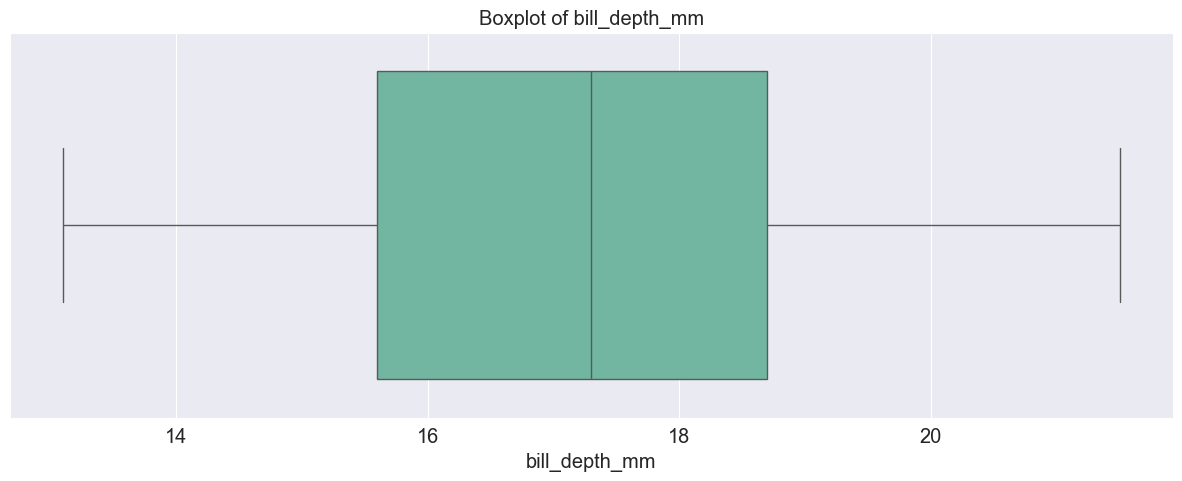

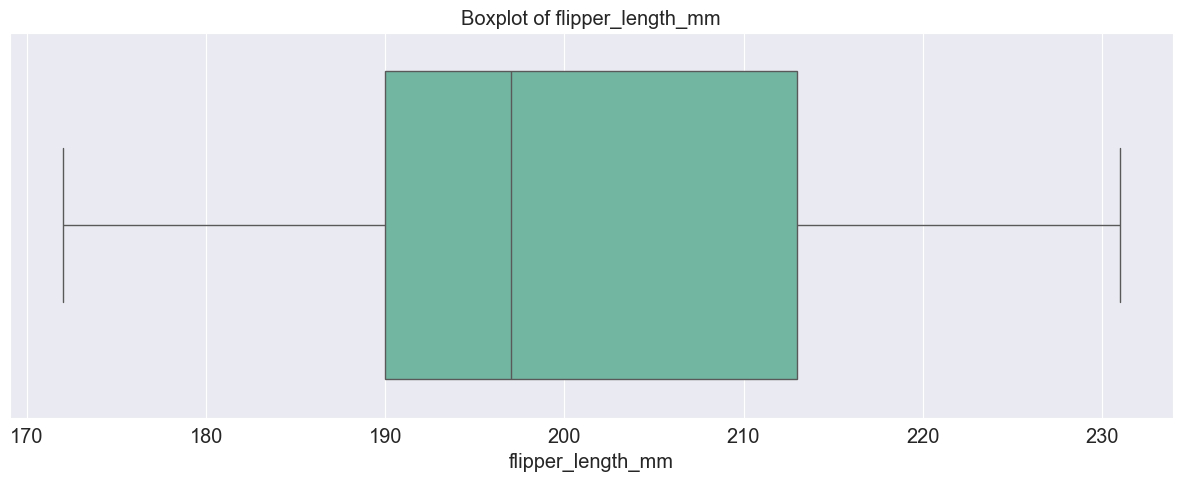

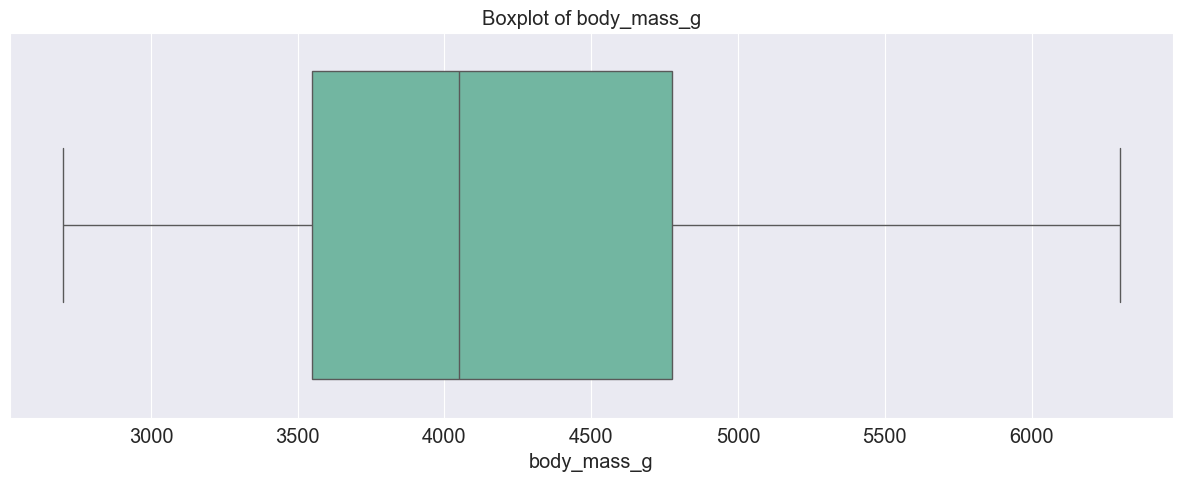


Unique values for sex column: ['MALE' 'FEMALE']


In [48]:
for column in dataset.columns:
    if dataset[column].dtype in ['float64']:
        sns.boxplot(x=dataset[column])
        plt.title(f'Boxplot of {column}')
        plt.show()
    else:
        print('\nUnique values for', column, 'column:', dataset[column].unique())

**Answer:** As per the box plot diagram, there is no any outliers.

**Q.2.1.3. Dealing with the unnecessary data**

**Answer:** No any unnecessary data were found.

**Q.2.1.4. Dealing with the inconsistent data**

**Answer:** No any inconsistent data were found.

**Q.2.1.5. Encoding categorical data**

In [49]:
# One Hot Encoding
dataset = pd.get_dummies(dataset, columns=['island', 'sex'])
dataset = dataset.replace({True:1, False:0})

In [50]:
dataset.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [51]:
dataset.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,2,3], inplace=True)

In [52]:
dataset

species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0          1            39.1           18.7              181.0       3750.0   
1          1            39.5           17.4              186.0       3800.0   
2          1            40.3           18.0              195.0       3250.0   
4          1            36.7           19.3              193.0       3450.0   
5          1            39.3           20.6              190.0       3650.0   
..       ...             ...            ...                ...          ...   
338        2            47.2           13.7              214.0       4925.0   
340        2            46.8           14.3              215.0       4850.0   
341        2            50.4           15.7              222.0       5750.0   
342        2            45.2           14.8              212.0       5200.0   
343        2            49.9           16.1              213.0       5400.0   

     island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0                0             0                 1           0         1  
1                0             0                 1           1         0  
2                0             0                 1           1         0  
4                0             0                 1           1         0  
5                0             0                 1           0         1  
..             ...           ...               ...         ...       ...  
338              1             0                 0           1         0  
340              1             0                 0           1         0  
341              1             0                 0           0         1  
342              1             0                 0           1         0  
343              1             0                 0           0         1  

[333 rows x 10 columns]

**Q2.2. Visualize the dataset**

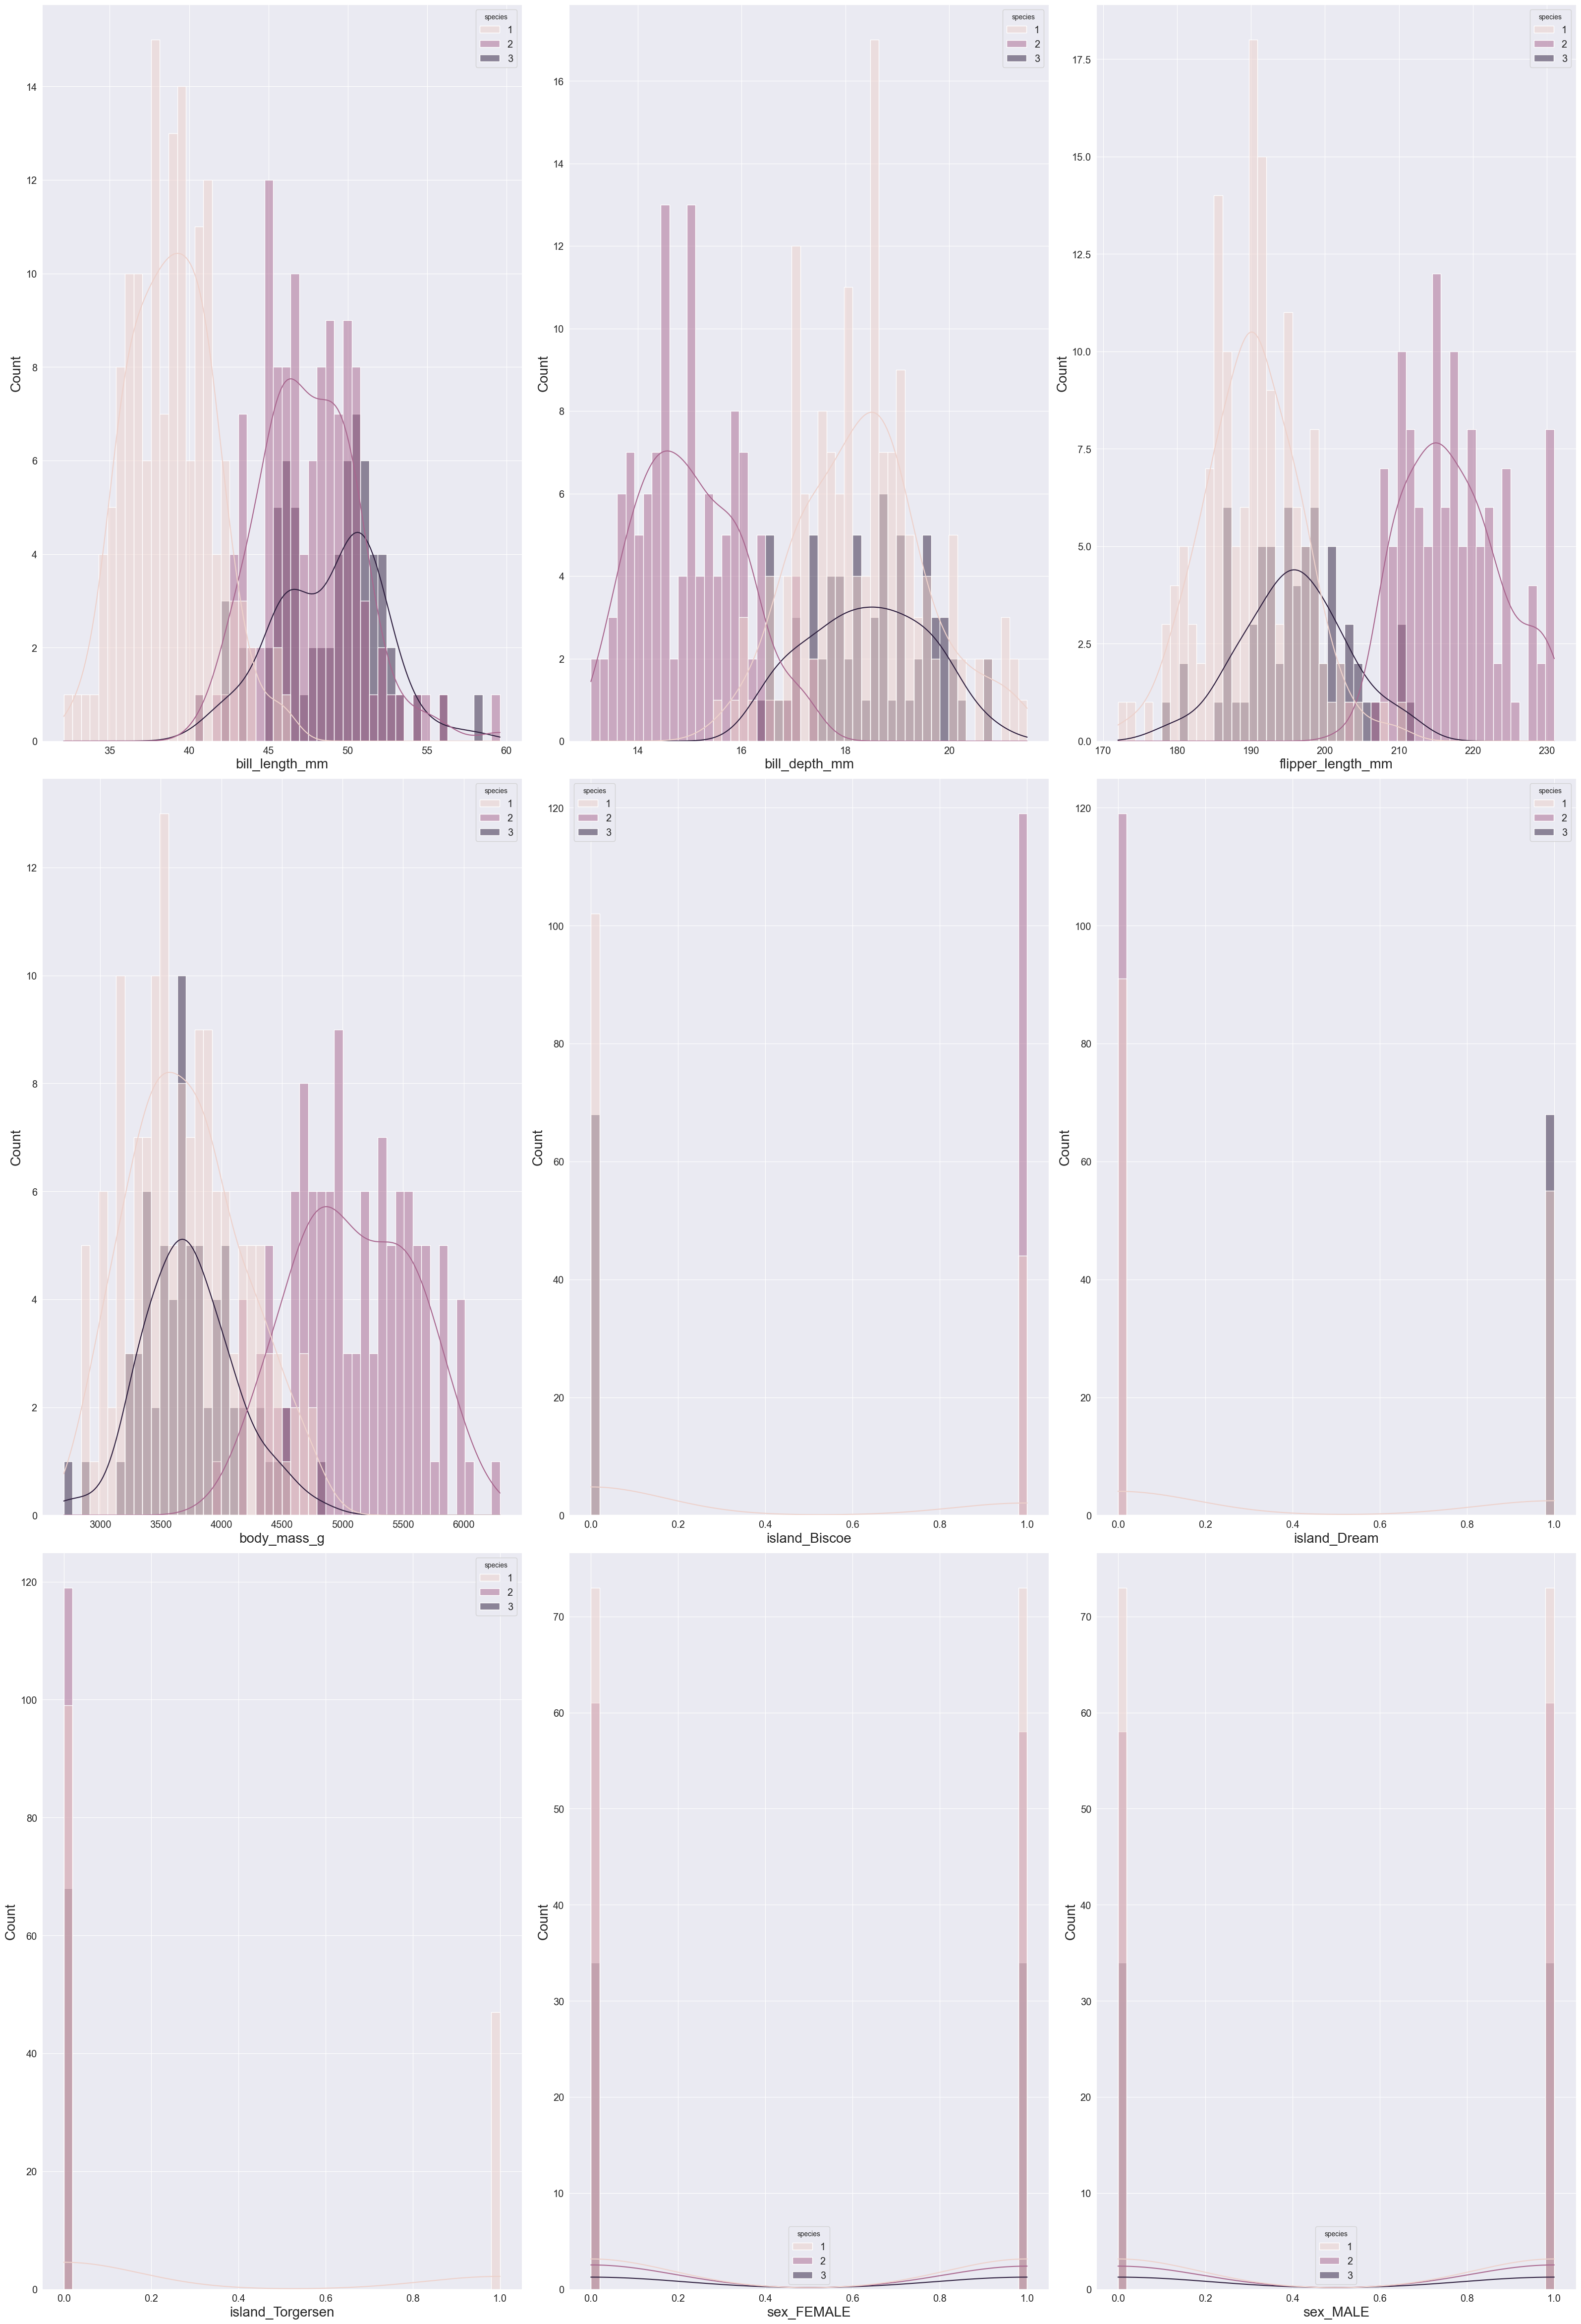

In [53]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(dataset, x=col, hue='species', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

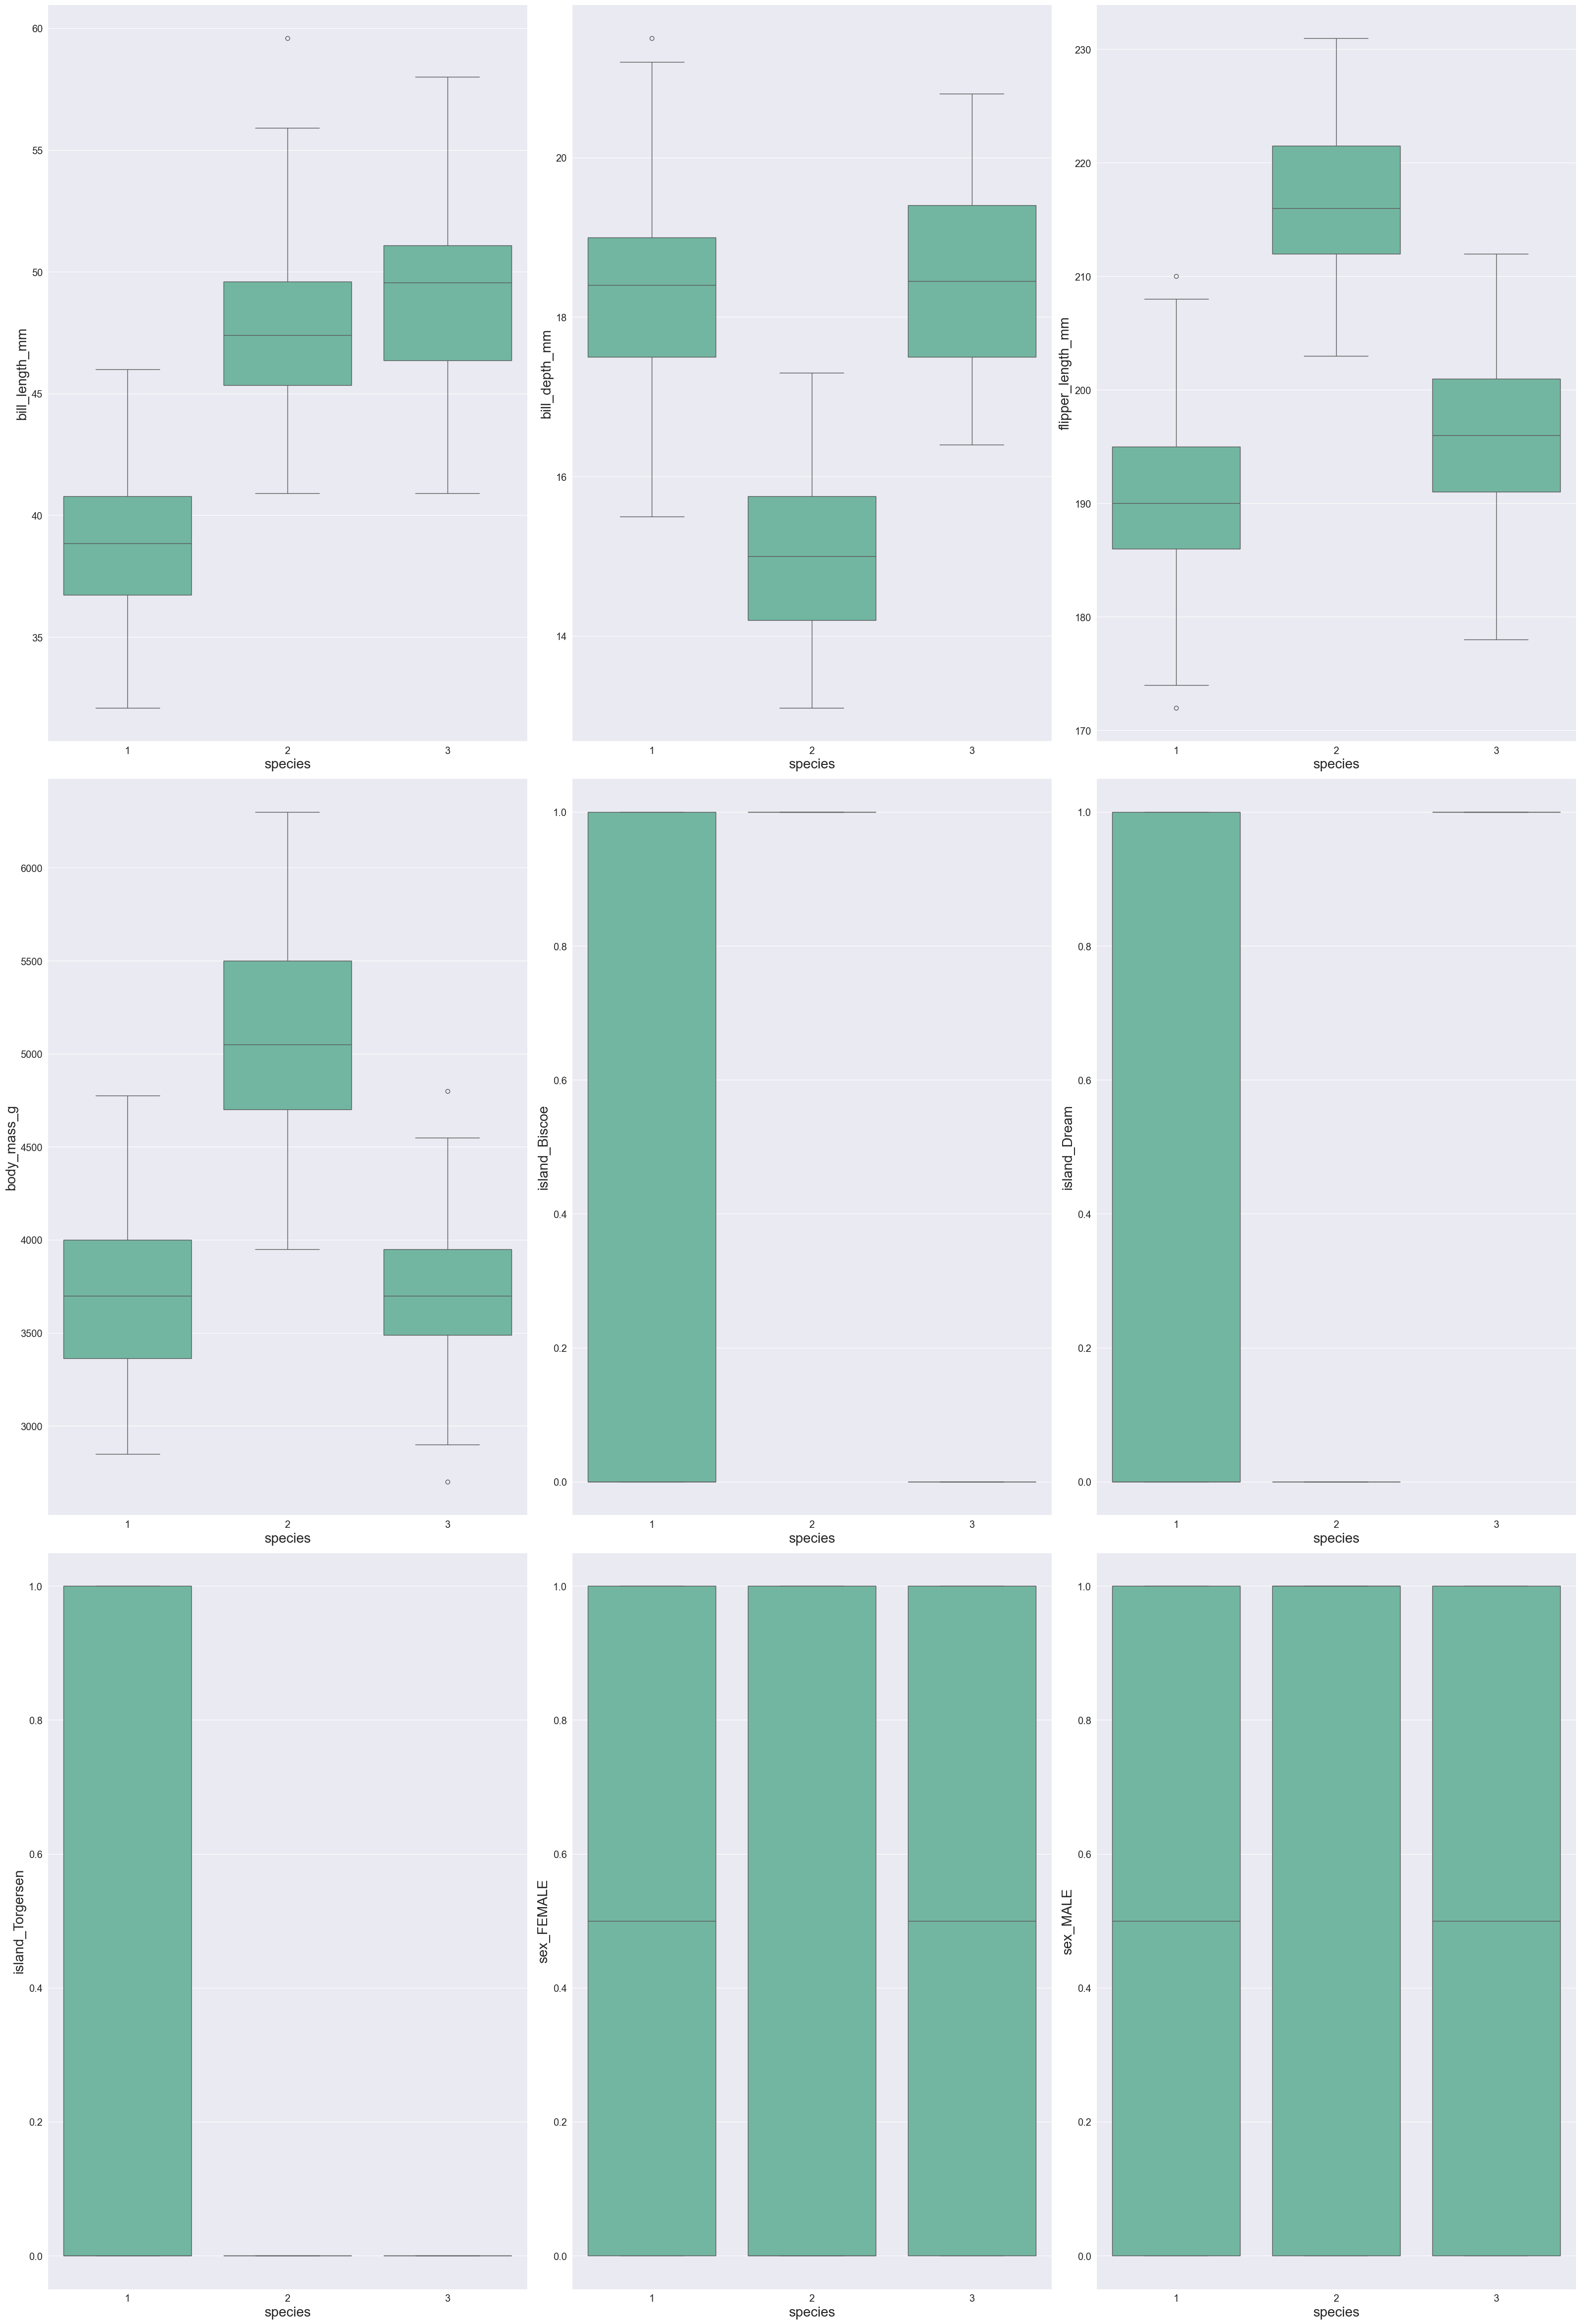

In [54]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=dataset, x='species', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('species', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

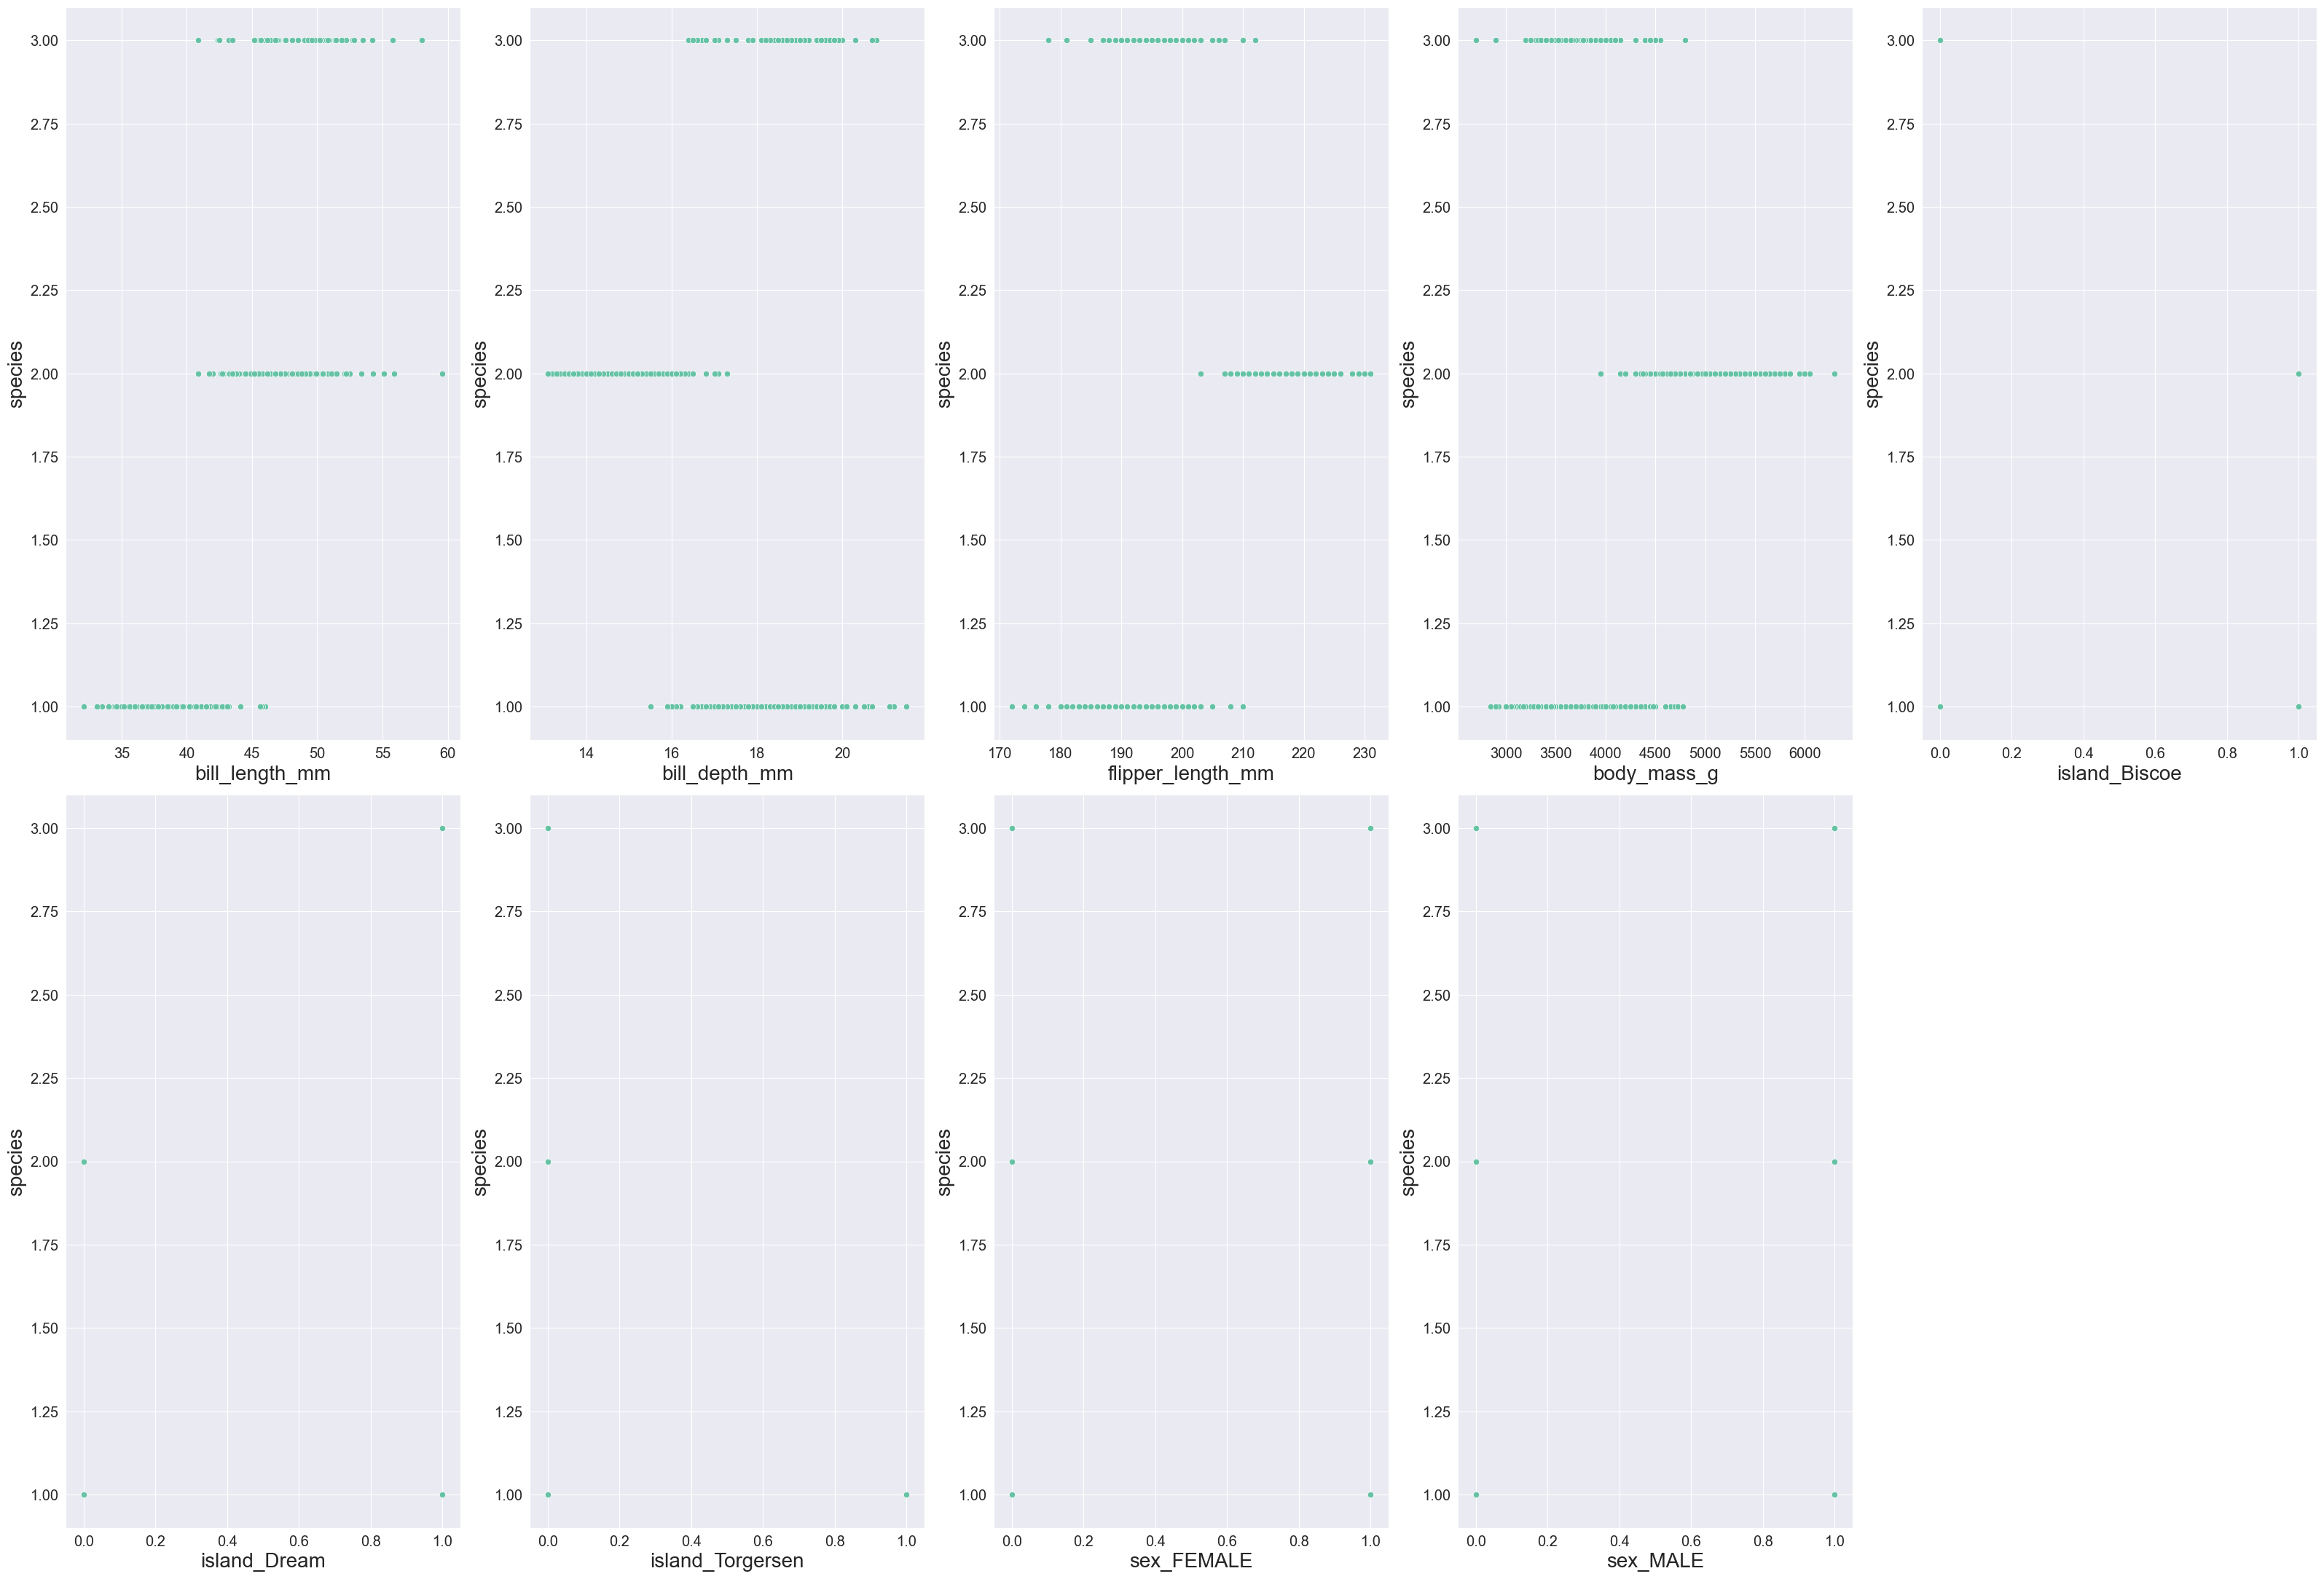

In [55]:
plt.figure(figsize=(32, 32))

num_cols = 5
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=dataset, x=col, y='species')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('species', fontsize=20)

plt.tight_layout()
plt.show()

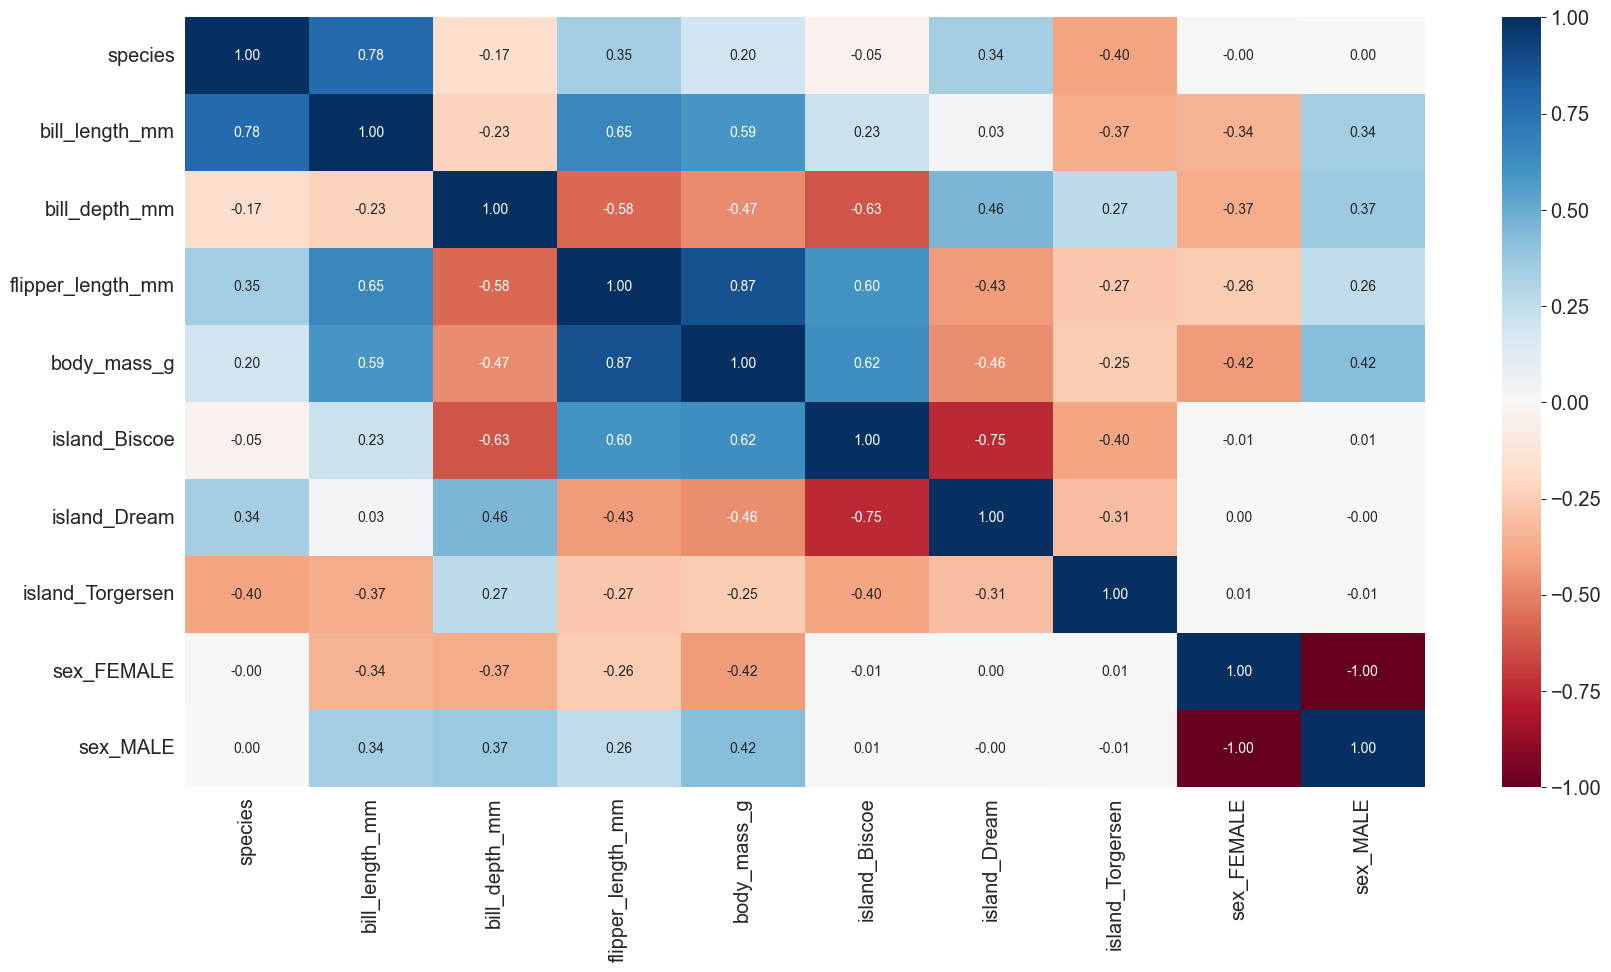

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset.corr(), cmap='RdBu', annot=True, fmt=".2f");

**Q2.3. Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability**

**Answer:** The dataset which is available under the 'penguins.csv' file consists of 344 rows and 6 columns to predict the dependent variable 'species' i.e. 7 columns in total. This data consists of a total of 11 rows that have missing values. Therefore, we dropped these data which resulted in 344-11 = 333 remaining rows.

Upon visualizing the data using a box plot diagram, we found that the data is clean and does not consist of any outliers. Also, we could not find any unnecessary data or any inconsistent data. There exist 3 columns with categorical values: 'island', 'sex', and 'species.' Since the distinct values in all these columns were very low, we used 'One Hot Encoding' for 'island', and 'sex' i.e. except the dependent variable 'species.' For the dependent variable 'species', we used 'Find and Replace' to replace 3 classes with an arbitrary number.

Finally, from the heatmap diagram, we can conclude that the dependent variable has a high correlation with the 'bill_length_mm' column and a low correlation with the 'sex' columns.

**Q2.4. Build a classification model using Logistic Regression to predict the penguins species.**

In [57]:
# Getting independent and dependent variables 
y = dataset.species.values
X = dataset.drop(['species'], axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [59]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test))

In [60]:
X_train

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
170        0.007365       0.002952           0.030159     0.547619   
239        0.007730       0.002397           0.035238     0.849206   
214        0.007254       0.002698           0.030952     0.579365   
6          0.006175       0.002825           0.028730     0.575397   
38         0.005968       0.003063           0.028730     0.523810   
..              ...            ...                ...          ...   
332        0.006905       0.002413           0.033810     0.738095   
198        0.007952       0.002841           0.030159     0.539683   
123        0.006571       0.002937           0.032063     0.615079   
53         0.006667       0.003095           0.031746     0.642857   
178        0.008016       0.002921           0.031746     0.539683   

     island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
170       0.000000      0.000159          0.000000    0.000159  0.000000  
239       0.000159      0.000000          0.000000    0.000000  0.000159  
214       0.000000      0.000159          0.000000    0.000159  0.000000  
6         0.000000      0.000000          0.000159    0.000159  0.000000  
38        0.000000      0.000159          0.000000    0.000159  0.000000  
..             ...           ...               ...         ...       ...  
332       0.000159      0.000000          0.000000    0.000159  0.000000  
198       0.000000      0.000159          0.000000    0.000159  0.000000  
123       0.000000      0.000000          0.000159    0.000000  0.000159  
53        0.000159      0.000000          0.000000    0.000000  0.000159  
178       0.000000      0.000159          0.000000    0.000159  0.000000  

[249 rows x 9 columns]

In [61]:
X_test

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
62         0.006267       0.002833           0.030833     0.600000   
60         0.005950       0.002817           0.030833     0.525000   
283        0.009050       0.002617           0.038500     0.941667   
107        0.006367       0.003333           0.031667     0.650000   
65         0.006933       0.003000           0.032000     0.658333   
..              ...            ...                ...          ...   
228        0.007217       0.002233           0.034833     0.733333   
206        0.007083       0.002883           0.031167     0.558333   
260        0.007117       0.002283           0.034667     0.658333   
263        0.008267       0.002500           0.036000     0.791667   
337        0.008133       0.002700           0.037000     1.000000   

     island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
62        0.000167      0.000000               0.0    0.000167  0.000000  
60        0.000167      0.000000               0.0    0.000167  0.000000  
283       0.000167      0.000000               0.0    0.000000  0.000167  
107       0.000167      0.000000               0.0    0.000000  0.000167  
65        0.000167      0.000000               0.0    0.000000  0.000167  
..             ...           ...               ...         ...       ...  
228       0.000167      0.000000               0.0    0.000167  0.000000  
206       0.000000      0.000167               0.0    0.000167  0.000000  
260       0.000167      0.000000               0.0    0.000167  0.000000  
263       0.000167      0.000000               0.0    0.000000  0.000167  
337       0.000167      0.000000               0.0    0.000000  0.000167  

[84 rows x 9 columns]

In [62]:
logisticRegr = LogisticRegression(max_iter=1000)

In [63]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [64]:
y_pred = logisticRegr.predict(X_test)

In [65]:
y_pred

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2], dtype=int64)

In [66]:
y_test

array([1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 2, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 1,
       2, 2, 3, 2, 2, 3, 2, 3, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2], dtype=int64)

**Q2.5. Evaluate and discuss the model performance**

In [67]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.75


In [68]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.72      0.86      0.78        42
           2       0.79      0.96      0.87        28
           3       0.00      0.00      0.00        14

    accuracy                           0.75        84
   macro avg       0.50      0.61      0.55        84
weighted avg       0.62      0.75      0.68        84



In [69]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[36  6  0]
 [ 1 27  0]
 [13  1  0]]


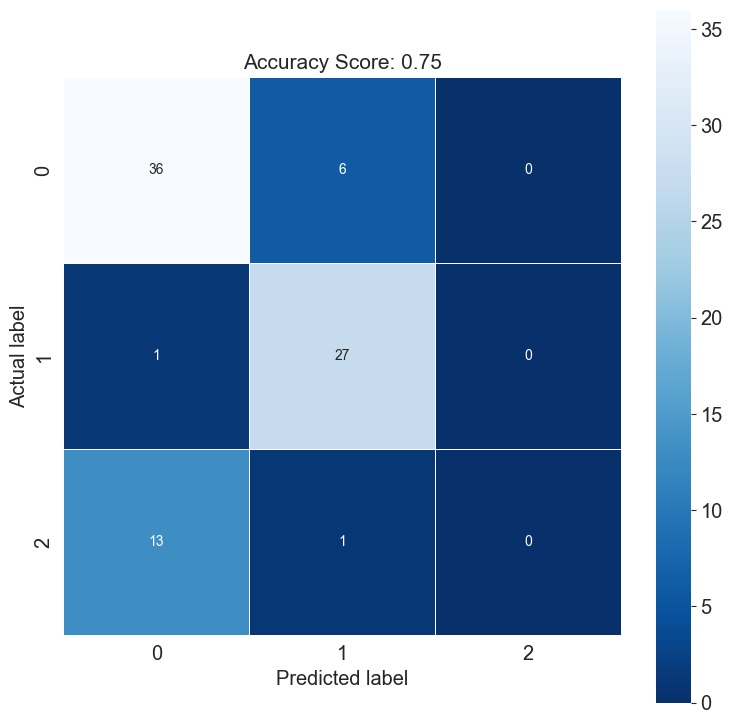

In [70]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [71]:
misclassifiedIndexes = []
mapping = {
    1: "Adelie",
    2: "Gentoo",
    3: "Chinstrap"
}
for index, (label, predict) in enumerate(zip(y_test, y_pred)):
    if label != predict: 
        print(f"Species: {mapping[label]} misclassified as {mapping[predict]} @ index: {index} ")
        misclassifiedIndexes.append(index)

Species: Chinstrap misclassified as Adelie @ index: 6 
Species: Chinstrap misclassified as Adelie @ index: 9 
Species: Chinstrap misclassified as Adelie @ index: 13 
Species: Chinstrap misclassified as Adelie @ index: 18 
Species: Adelie misclassified as Gentoo @ index: 26 
Species: Adelie misclassified as Gentoo @ index: 30 
Species: Chinstrap misclassified as Gentoo @ index: 31 
Species: Chinstrap misclassified as Adelie @ index: 33 
Species: Chinstrap misclassified as Adelie @ index: 36 
Species: Chinstrap misclassified as Adelie @ index: 38 
Species: Adelie misclassified as Gentoo @ index: 39 
Species: Adelie misclassified as Gentoo @ index: 44 
Species: Adelie misclassified as Gentoo @ index: 49 
Species: Chinstrap misclassified as Adelie @ index: 50 
Species: Adelie misclassified as Gentoo @ index: 57 
Species: Chinstrap misclassified as Adelie @ index: 61 
Species: Chinstrap misclassified as Adelie @ index: 68 
Species: Chinstrap misclassified as Adelie @ index: 71 
Species: Chi

**Answer:**

**Accuracy** - The accuracy of this model is 0.75 which means that the model correctly predicts the class label for about 75% of probability.

**Precision** -  
> For class 'Adelie', the precision is 0.72, indicating that 72% of the samples predicted as class 'Adelie' are actually class 'Adelie'. 

> For class 'Gentoo', the precision is 0.79, indicating that 79% of the samples predicted as class 'Gentoo' are actually class 'Gentoo'.

> For class 'Chinstrap', the precision is 0.00, which suggests that the model did not correctly predict any samples as class 'Chinstrap'.

**Recall** - 
> For class 'Adelie', the recall is 0.86, indicating that 86% of the actual class 'Adelie' samples are correctly predicted as class 'Adelie'. 

> For class 'Gentoo', the recall is 0.96, indicating that 96% of the actual class 'Gentoo' samples are correctly predicted as class 'Gentoo'.

> For class 'Chinstrap', the recall is 0.00, indicating that the model did not correctly predict any samples as class 'Chinstrap'.

**F1-score** - 
> For class 'Adelie', the F1-score is 0.78. 

> For class 'Gentoo', the F1-score is 0.87. 

> For class 'Chinstrap', the F1-score is 0.00.

**Confusion Matrix** - The confusion matrix provides a breakdown of the model's predictions for each class. It shows that the model correctly predicted 36 samples of class 'Adelie' and 27 samples of class 'Gentoo'. However, it incorrectly classified 6 samples of class 'Adelie' as the class 'Gentoo' and 13 samples of class 'Gentoo' as the class 'Adelie'. Additionally, the model did not correctly predict any samples as class 'Chinstrap'.

In summary, the logistic regression model has a moderate accuracy score of 0.75. It performs relatively well in predicting classes 'Adelie' and 'Gentoo', with reasonably high precision and recall scores. However, the model struggles to predict class 'Chinstrap', with a precision, recall, and F1-score of 0.00, indicating poor performance for this class.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

**Answer:**

**1.** While performing this activity, I found it less difficult compared to the Lab 1 activity for data pre-processing steps, probably because they were used in Lab 1 as well and I got familiar with them. In addition, last week we covered a data preprocessing topic in my Data Analytics and Visualization course. However, I am still very confused about data visualization for this lab. I took the reference from the example explained in the class, but I am still unsure of how to analyze those graphs and what information can be inferred from them.

**2.** As I want to excel in Data Analysis and get into the field of Data Science, I think this course has provided me with the motivation and start for my dream journey. Last week, I learned about linear regression which was easy to imagine as the concepts were familiar. However, for logistics regression, it took a while for me to get used to it but the examples used in the class i.e. digit classification demonstrate a real-world scenario problem. So, I seek to learn more as all the topics learned so far seem important for me in my career.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab2.ipynb** to the **Lab 2 - Binary and Multi-class Classification Using Logistic Regression (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                  | Excellent                                                   | Good                                                        | Average                                                    | Below Average                                               | Poor                                                        | No Attempt                                                 |
|--------------------------------------------|-------------------------------------------------------------|-------------------------------------------------------------|------------------------------------------------------------|--------------------------------------------------------------|-------------------------------------------------------------|------------------------------------------------------------|
| **Part 1:** Activity-Question 1.1           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.2           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.3           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.4           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.5           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.1           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.2           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.3           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.4           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.5           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 2:** Reflection                      | **10 points** - Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points** - Reflection mostly ties to the module content; experience & importance are discussed | **6 points** - Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points** - Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points** - Minimal effort to tie to content; minimal effort to describe experience/importance | **0 points** - Did not complete the reflection                 |
